# EDA

In [ ]:
# !pip install xgboost
# !pip install pandas
# !pip install seaborn
# !pip install numpy
# !pip install scikit-learn
# !pip install imbalanced-learn
# !pip install joblib
# !pip install interpret

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pdb #Just for debuggin in Google Colab

#dataset location
file_path = "C:/Users/SH2/Desktop/ISYE-Project/Project/Code/Data/UNSW_2018_IoT_Botnet_Final_10_Best.csv"
#file_path = "C:/Users/SH2/Desktop/Shaya/OMS-Analytics/ISYE-7406 - Data Mining and Statistical Learning/Project/Code/Data/UNSW_2018_IoT_Botnet_Final_10_Best.csv"
#file_path = "/content/drive/MyDrive/Colab Notebooks/UNSW_2018_IoT_Botnet_Final_10_Best.csv"

#load dataset
df = pd.read_csv(file_path, delimiter=";")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

C:\Users\SH2\AppData\Local\Temp\ipykernel_22512\1076422496.py:13: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=";")


,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


Rename columns just to make it more clear:

In [12]:
df.rename(columns={
    "pkSeqID": "Packet_Seq_ID",
    "proto": "Protocol_Type",
    "saddr": "Source_IP",
    "sport": "Source_Port",
    "daddr": "Destination_IP",
    "dport": "Destination_Port",
    "seq": "Packet_Seq_Num",
    "stddev": "Traffic_StdDev",
    "N_IN_Conn_P_SrcIP": "Inbound_Conn_Per_SrcIP",
    "min": "Min_Flow_Duration",
    "state_number": "State_Num",
    "mean": "Mean_Flow_Duration",
    "N_IN_Conn_P_DstIP": "Inbound_Conn_Per_DstIP",
    "drate": "Destination_Packet_Rate",
    "srate": "Source_Packet_Rate",
    "max": "Max_Flow_Duration",
    "attack": "Attack_Label",
    "category": "Attack_Category",
    "subcategory": "Attack_Subcategory"
}, inplace=True)

df.head()

,Packet_Seq_ID,Protocol_Type,Source_IP,Source_Port,Destination_IP,Destination_Port,Packet_Seq_Num,Traffic_StdDev,Inbound_Conn_Per_SrcIP,Min_Flow_Duration,State_Num,Mean_Flow_Duration,Inbound_Conn_Per_DstIP,Destination_Packet_Rate,Source_Packet_Rate,Max_Flow_Duration,Attack_Label,Attack_Category,Attack_Subcategory
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


Looks like columns 4 (sport) and 6 (dport) have mixed data types. We focuse on them first

In [13]:
non_numeric_sport = df[~df["Source_Port"].astype(str).str.isnumeric()]
print("Non-numeric in Source_Port:\n", non_numeric_sport["Source_Port"].unique())

non_numeric_dport = df[~df["Destination_Port"].astype(str).str.isnumeric()]
print("Non-numeric in Destination_Port:\n", non_numeric_dport["Destination_Port"].unique())


Non-numeric in Source_Port:
 [-1 '-1' '0x0303' '0x0008' '0x000d' '0x0011']
Non-numeric in Destination_Port:
 [-1 '-1' '0x5000' ... '0x3ead' '0xeeaa' '0x9a89']


It seems that columns contain both numeric and non-numeric values. We replace -1 with Nan and convert Hexadecimals to integers.

In [14]:
import numpy as np

def convert_to_numeric(value):
  if isinstance(value, str) and value.startswith("0x"):
    return int(value, 16)
  num_value = int(value)
  return np.nan if num_value == -1 else num_value

df["Source_Port"] = df["Source_Port"].apply(convert_to_numeric)
df["Destination_Port"] = df["Destination_Port"].apply(convert_to_numeric)

print("Missing values in Source_Port:", df["Source_Port"].isna().sum())
print("Missing values in Destination_Port:", df["Destination_Port"].isna().sum())


Missing values in Source_Port: 213
Missing values in Destination_Port: 213


We have 3,668,522 total rows and only 213 rows with missing values in sport and dport.  We also droped Packet_Seq_ID and Source_IP and Destination_IP. (In this dataset we have all private IPs within a simulated environment. They do not contain public IPs with location data.)

In [15]:
df.dropna(subset=["Source_Port", "Destination_Port"], inplace=True)
df.drop(columns=["Packet_Seq_ID", "Source_IP", "Destination_IP"], inplace=True)

df['Source_Port'] = df['Source_Port'].astype(int)
df['Destination_Port'] = df['Destination_Port'].astype(int)


In [16]:
df_head = df.head()
print("\n Dataset info: \n")
df.info(verbose=True)
print("\n Dataset shape: \n", df.shape)
print("\n Dataset head: \n", df_head)
print("\n Missing values: \n", df.isnull().sum())
print("\n Dataset description: \n", df.describe())


 Dataset info: 

<class 'pandas.core.frame.DataFrame'>
Index: 3668309 entries, 0 to 3668520
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Protocol_Type            object 
 1   Source_Port              int64  
 2   Destination_Port         int64  
 3   Packet_Seq_Num           int64  
 4   Traffic_StdDev           float64
 5   Inbound_Conn_Per_SrcIP   int64  
 6   Min_Flow_Duration        float64
 7   State_Num                int64  
 8   Mean_Flow_Duration       float64
 9   Inbound_Conn_Per_DstIP   int64  
 10  Destination_Packet_Rate  float64
 11  Source_Packet_Rate       float64
 12  Max_Flow_Duration        float64
 13  Attack_Label             int64  
 14  Attack_Category          object 
 15  Attack_Subcategory       object 
dtypes: float64(6), int64(7), object(3)
memory usage: 475.8+ MB

 Dataset shape: 
 (3668309, 16)

 Dataset head: 
   Protocol_Type  Source_Port  Destination_Port  Packet_Seq_Num  \
0        

Class Distribution

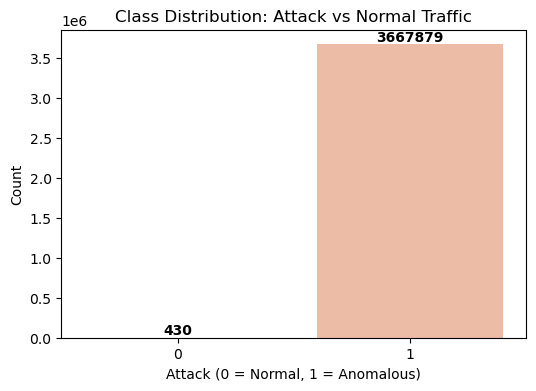

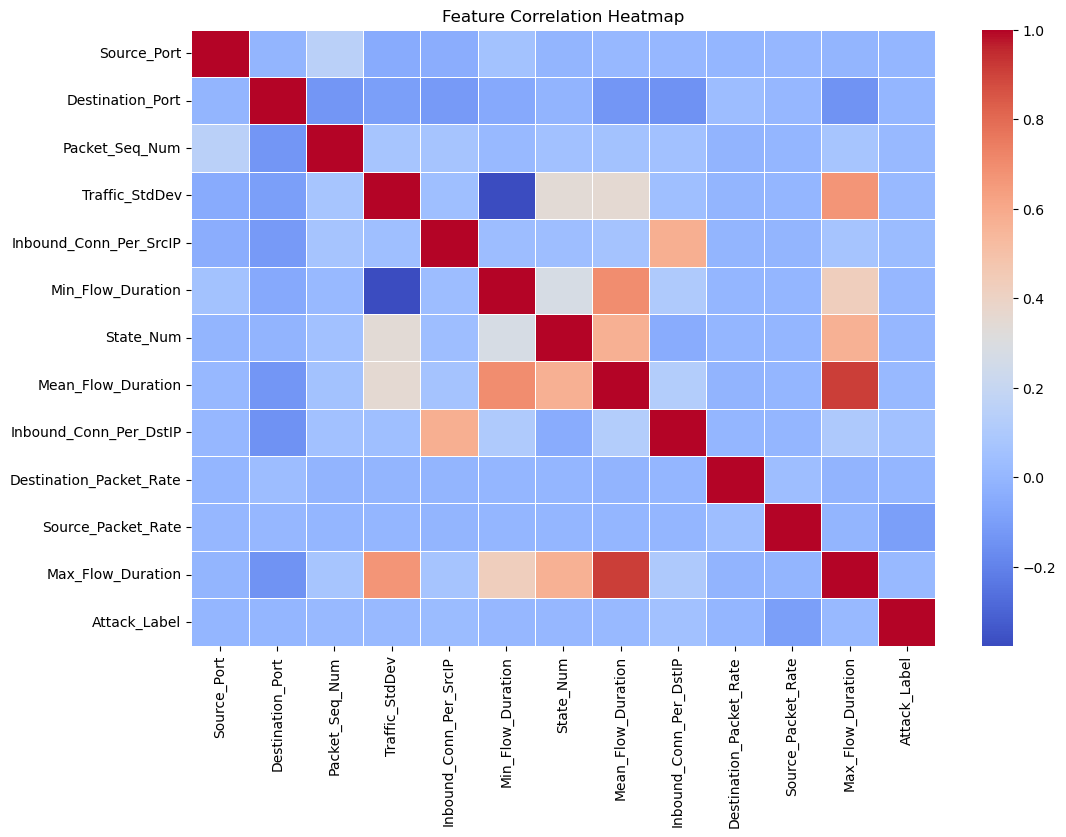

C:\Users\SH2\AppData\Local\Temp\ipykernel_22512\2498645569.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette="viridis")


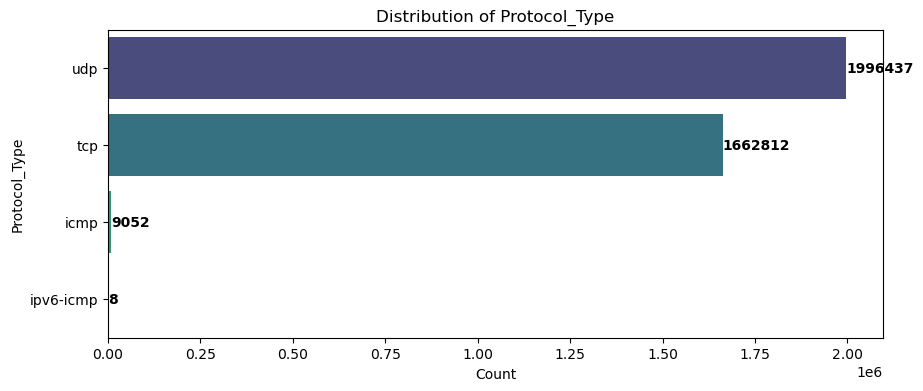

C:\Users\SH2\AppData\Local\Temp\ipykernel_22512\2498645569.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette="viridis")


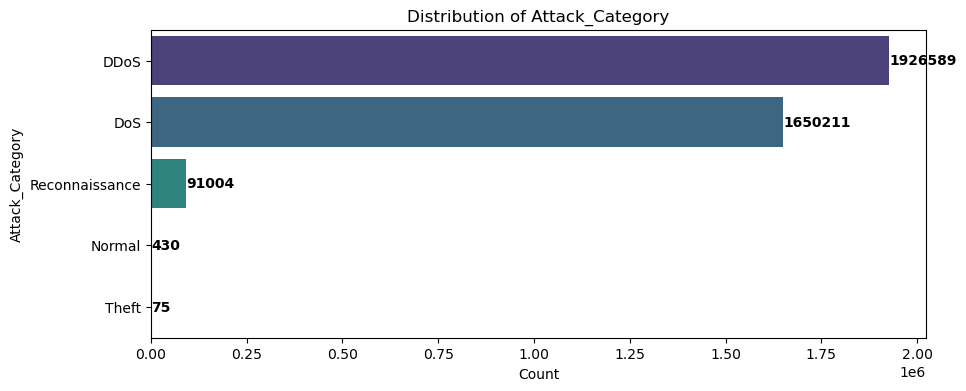

C:\Users\SH2\AppData\Local\Temp\ipykernel_22512\2498645569.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette="viridis")


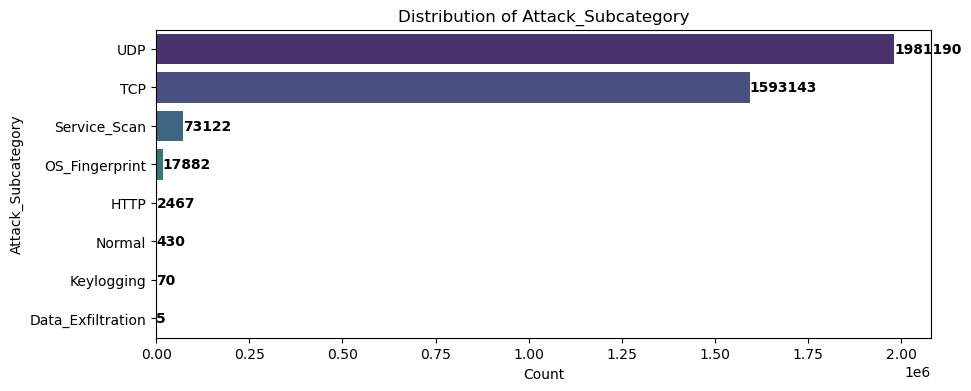

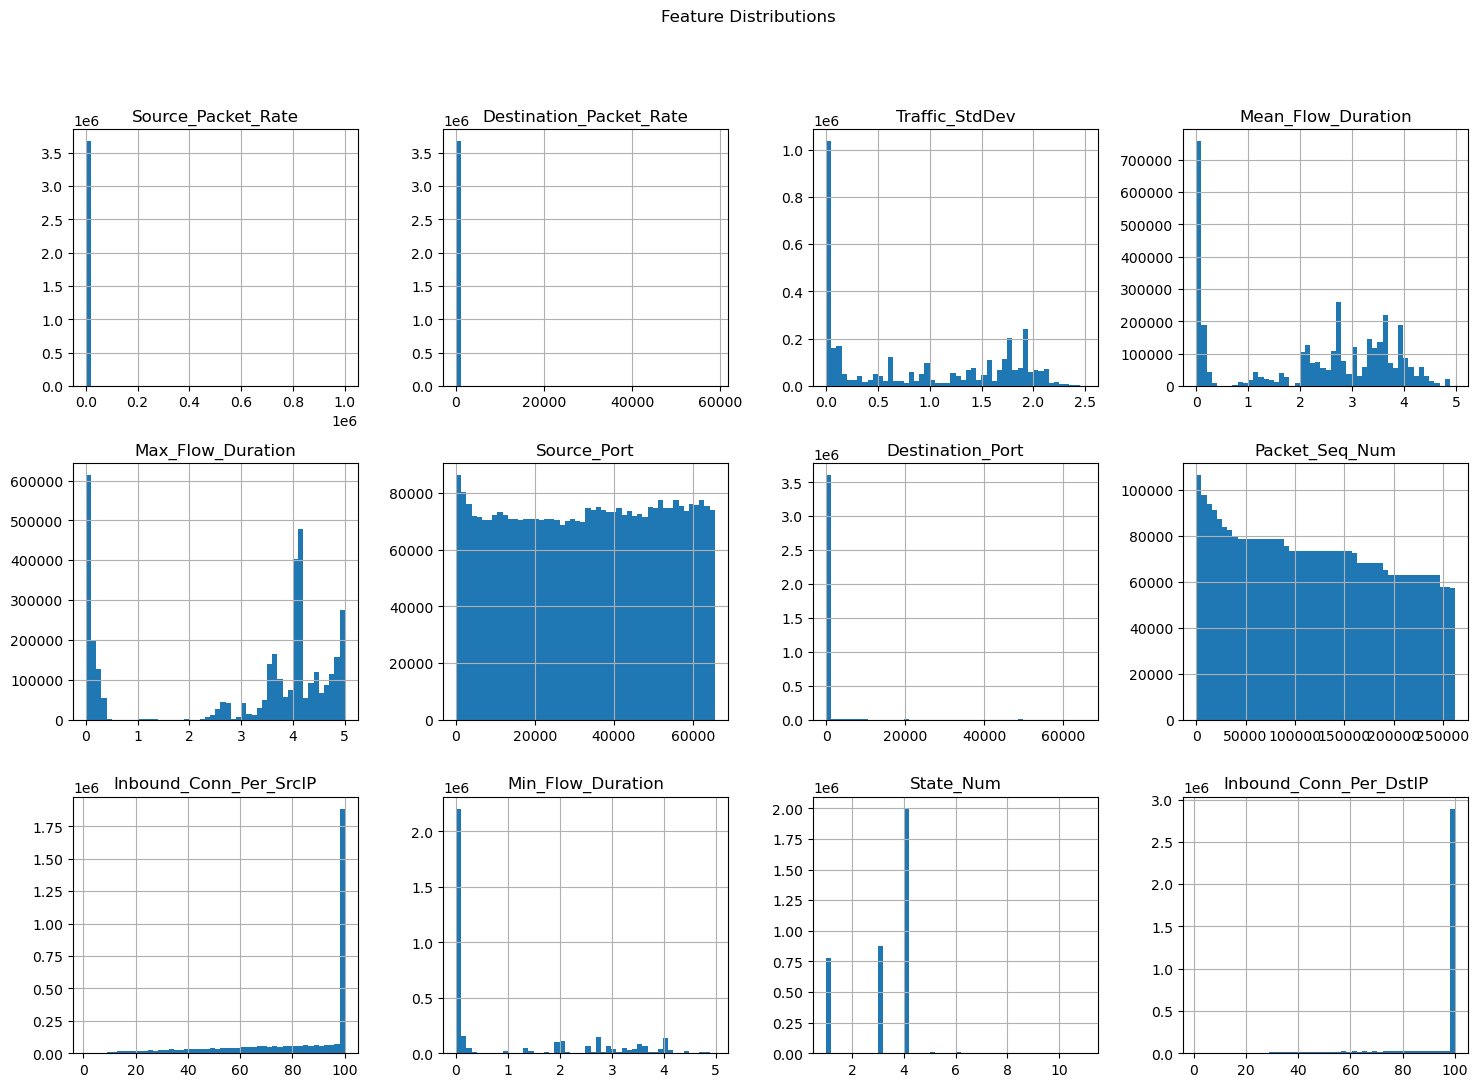

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#class distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df["Attack_Label"], hue=df["Attack_Label"], palette="coolwarm", legend=False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Class Distribution: Attack vs Normal Traffic")
plt.xlabel("Attack (0 = Normal, 1 = Anomalous)")
plt.ylabel("Count")
plt.show()



#heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#categorical distributions
categorical_features = ["Protocol_Type", "Attack_Category", "Attack_Subcategory"]

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette="viridis")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}',
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, fontweight='bold')
    plt.title(f"Distribution of {feature}")
    plt.ylabel(feature)
    plt.xlabel("Count")
    plt.show()


#histograms - numerical
numerical_features = ["Source_Packet_Rate", "Destination_Packet_Rate", "Traffic_StdDev", "Mean_Flow_Duration", "Max_Flow_Duration", "Source_Port", "Destination_Port", "Packet_Seq_Num",
"Inbound_Conn_Per_SrcIP", "Min_Flow_Duration", "State_Num", "Inbound_Conn_Per_DstIP"]
df[numerical_features].hist(figsize=(18, 12), bins=50, layout=(3, 4))
plt.suptitle("Feature Distributions")
plt.show()

Dropping Attack_Subcategory as we just want to classify Attck and Categories.

In [18]:
df = df.drop(columns=["Attack_Subcategory"], errors="ignore")

# Convert Categorical Variables into numerical variables

In [19]:
print(df["Attack_Category"].unique())
print(df.columns)

['DoS' 'DDoS' 'Normal' 'Reconnaissance' 'Theft']
Index(['Protocol_Type', 'Source_Port', 'Destination_Port', 'Packet_Seq_Num',
       'Traffic_StdDev', 'Inbound_Conn_Per_SrcIP', 'Min_Flow_Duration',
       'State_Num', 'Mean_Flow_Duration', 'Inbound_Conn_Per_DstIP',
       'Destination_Packet_Rate', 'Source_Packet_Rate', 'Max_Flow_Duration',
       'Attack_Label', 'Attack_Category'],
      dtype='object')


In [20]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Protocol_Type", "Attack_Category"]
df = pd.get_dummies(df, columns=categorical_features, drop_first=False)

print("New dataset shape after encoding:", df.shape)
print("First few rows after encoding:\n", df.head())
print(df.columns)

New dataset shape after encoding: (3668309, 22)
First few rows after encoding:
    Source_Port  Destination_Port  Packet_Seq_Num  Traffic_StdDev  \
0        49960                80               9        0.068909   
2        49962                80              11        0.064494   
3        49964                80              12        0.064189   
4        49966                80              13        0.063887   
5        49968                80              14        0.063579   

   Inbound_Conn_Per_SrcIP  Min_Flow_Duration  State_Num  Mean_Flow_Duration  \
0                      75                0.0          1            0.068909   
2                      75                0.0          1            0.064494   
3                      75                0.0          1            0.064189   
4                      75                0.0          1            0.063887   
5                      75                0.0          1            0.063579   

   Inbound_Conn_Per_DstIP  Destinati

In [21]:
print("Unique value counts per column:\n")
for col, count in df.nunique().items():
    print(f"{col}: {count}")

Unique value counts per column:

Source_Port: 65536
Destination_Port: 7551
Packet_Seq_Num: 262212
Traffic_StdDev: 421350
Inbound_Conn_Per_SrcIP: 100
Min_Flow_Duration: 271083
State_Num: 11
Mean_Flow_Duration: 507039
Inbound_Conn_Per_DstIP: 100
Destination_Packet_Rate: 20620
Source_Packet_Rate: 119603
Max_Flow_Duration: 594472
Attack_Label: 2
Protocol_Type_icmp: 2
Protocol_Type_ipv6-icmp: 2
Protocol_Type_tcp: 2
Protocol_Type_udp: 2
Attack_Category_DDoS: 2
Attack_Category_DoS: 2
Attack_Category_Normal: 2
Attack_Category_Reconnaissance: 2
Attack_Category_Theft: 2


# Scaling

We are going to do scaling inside Monte Carlo CV, since we should scale on the training set and transfer the scale over to the testing set. This is done by using the methods fit and transform separately.

stackoverflow:
https://stackoverflow.com/questions/66489965/can-i-use-standardscaler-on-whole-data-set-or-should-i-calculate-on-train-and

# Feature Selection
1. Correlation Analysis

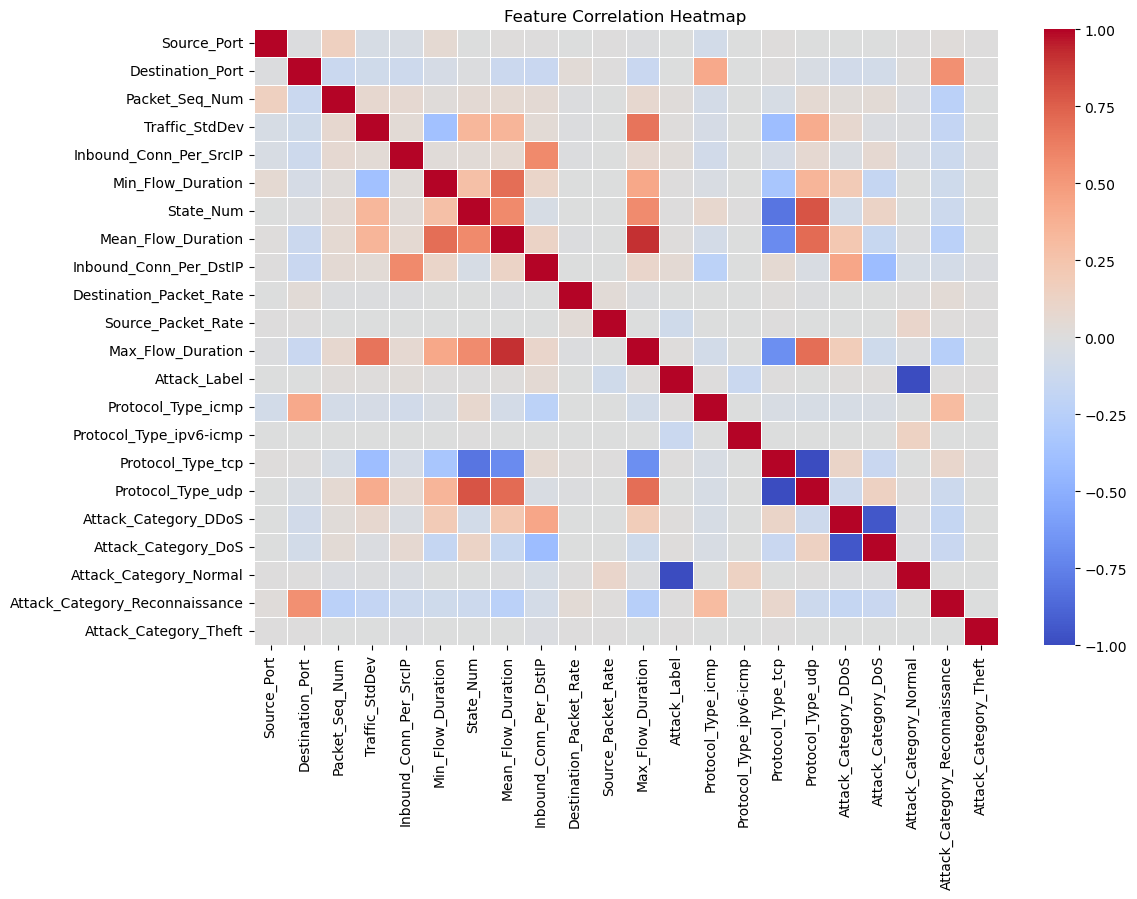

Highly Correlated Features: {'Attack_Label', 'Max_Flow_Duration', 'Mean_Flow_Duration', 'Attack_Category_DoS', 'Protocol_Type_udp', 'Protocol_Type_tcp', 'Attack_Category_DDoS', 'Attack_Category_Normal'}


In [68]:
#correlation matrix
corr_matrix = df.corr()

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#highly correlated features (corr > 0.9)
high_corr_features = set()
threshold = 0.9

for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if col != row and abs(corr_matrix.loc[row, col]) > threshold:
            high_corr_features.add(col)

print("Highly Correlated Features:", high_corr_features)


We are going to drop "Max_Flow_Duration" and keep "Mean_Flow_Duration" as it captures similar information based on the analysis

In [69]:
df.drop(columns=["Mean_Flow_Duration"], inplace=True)
print("Feature List:", df.columns)


Feature List: Index(['Source_Port', 'Destination_Port', 'Packet_Seq_Num', 'Traffic_StdDev',
       'Inbound_Conn_Per_SrcIP', 'Min_Flow_Duration', 'State_Num',
       'Inbound_Conn_Per_DstIP', 'Destination_Packet_Rate',
       'Source_Packet_Rate', 'Max_Flow_Duration', 'Attack_Label',
       'Protocol_Type_icmp', 'Protocol_Type_ipv6-icmp', 'Protocol_Type_tcp',
       'Protocol_Type_udp', 'Attack_Category_DDoS', 'Attack_Category_DoS',
       'Attack_Category_Normal', 'Attack_Category_Reconnaissance',
       'Attack_Category_Theft'],
      dtype='object')


2. Mutual Information (MI) Scores

In [70]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

df_mi = df.copy()

X_all = df_mi.drop(columns=["Attack_Label", "Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Normal", "Attack_Category_Reconnaissance", "Attack_Category_Theft"])

y_binary = df_mi["Attack_Label"]
y_multiclass = df_mi[["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Normal", "Attack_Category_Reconnaissance", "Attack_Category_Theft"]].idxmax(axis=1)

mi_binary = mutual_info_classif(X_all, y_binary, discrete_features='auto')
mi_binary_df = pd.DataFrame({'Feature': X_all.columns, 'MI_Score': mi_binary}).sort_values(by='MI_Score', ascending=False)

mi_multiclass = mutual_info_classif(X_all, y_multiclass, discrete_features='auto')
mi_multiclass_df = pd.DataFrame({'Feature': X_all.columns, 'MI_Score': mi_multiclass}).sort_values(by='MI_Score', ascending=False)

print("Mutual Information Scores - Binary Classification (Attack_Label):")
print(mi_binary_df)

print("\nMutual Information Scores - Multiclass Classification (Attack_Category):")
print(mi_multiclass_df)

threshold = 0.01  #threshold to remove low-importance ones

low_importance_binary = mi_binary_df[mi_binary_df["MI_Score"] < threshold]["Feature"].tolist()
low_importance_multiclass = mi_multiclass_df[mi_multiclass_df["MI_Score"] < threshold]["Feature"].tolist()

df_filtered_binary = df_mi.drop(columns=set(low_importance_binary))
df_filtered_multiclass = df_mi.drop(columns=set(low_importance_multiclass))

print("\nFeatures removed - Binary Classification:", set(low_importance_binary))
print("\nFeature List - Binary Classification:", df_filtered_binary.columns)

print("\nFeatures removed - Multiclass Classification:", set(low_importance_multiclass))
print("\nFeature List - Multiclass Classification:", df_filtered_multiclass.columns)

df_filtered_binary.to_csv("df_filtered_binary.csv", index=False)
df_filtered_multiclass.to_csv("df_filtered_multiclass.csv", index=False)


Mutual Information Scores - Binary Classification (Attack_Label):
                    Feature  MI_Score
6                 State_Num  0.219432
7    Inbound_Conn_Per_DstIP  0.176371
4    Inbound_Conn_Per_SrcIP  0.120027
13        Protocol_Type_tcp  0.020411
1          Destination_Port  0.018505
2            Packet_Seq_Num  0.000482
9        Source_Packet_Rate  0.000468
5         Min_Flow_Duration  0.000335
10        Max_Flow_Duration  0.000321
3            Traffic_StdDev  0.000186
0               Source_Port  0.000170
11       Protocol_Type_icmp  0.000120
8   Destination_Packet_Rate  0.000068
12  Protocol_Type_ipv6-icmp  0.000024
14        Protocol_Type_udp  0.000000

Mutual Information Scores - Multiclass Classification (Attack_Category):
                    Feature  MI_Score
9        Source_Packet_Rate  0.736683
10        Max_Flow_Duration  0.618648
3            Traffic_StdDev  0.533272
7    Inbound_Conn_Per_DstIP  0.416958
5         Min_Flow_Duration  0.357540
6                 State_

2. Random Forest Feature Importance Analysis - Binary Classification

In [71]:
import pandas as pd
df_filtered = pd.read_csv("df_filtered_binary.csv")
print("Feature List:", df_filtered.columns)

Feature List: Index(['Destination_Port', 'Inbound_Conn_Per_SrcIP', 'State_Num',
       'Inbound_Conn_Per_DstIP', 'Attack_Label', 'Protocol_Type_tcp',
       'Attack_Category_DDoS', 'Attack_Category_DoS', 'Attack_Category_Normal',
       'Attack_Category_Reconnaissance', 'Attack_Category_Theft'],
      dtype='object')


Most Important Features (Averaged Over MCCV Splits):
Destination_Port          0.343044
Inbound_Conn_Per_DstIP    0.307897
State_Num                 0.172271
Inbound_Conn_Per_SrcIP    0.100660
Protocol_Type_tcp         0.076128
Name: Mean_Importance, dtype: float64


C:\Users\SH2\AppData\Local\Temp\ipykernel_25128\402124287.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feature_importance_scores.index, x=feature_importance_scores["Mean_Importance"], palette="viridis")


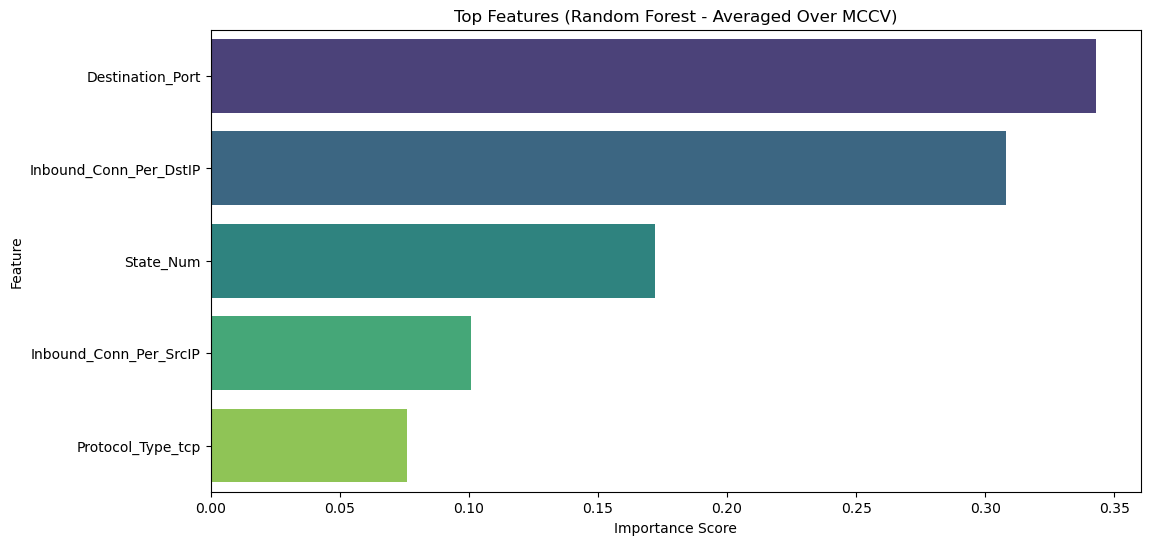

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = df_filtered.drop(columns=["Attack_Label", "Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Normal", "Attack_Category_Reconnaissance", "Attack_Category_Theft"])
y = df_filtered["Attack_Label"]

#MCCV
mccv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=85)
feature_importance_scores = pd.DataFrame(index=X.columns)

for i, (train_idx, test_idx) in enumerate(mccv.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf = RandomForestClassifier(n_estimators=100, random_state=85)
    rf.fit(X_train, y_train)

    feature_importance_scores[f"Split_{i+1}"] = rf.feature_importances_

feature_importance_scores["Mean_Importance"] = feature_importance_scores.mean(axis=1)
feature_importance_scores = feature_importance_scores.sort_values(by="Mean_Importance", ascending=False)

print("Most Important Features (Averaged Over MCCV Splits):")
print(feature_importance_scores["Mean_Importance"])

plt.figure(figsize=(12, 6))
sns.barplot(y=feature_importance_scores.index, x=feature_importance_scores["Mean_Importance"], palette="viridis")
plt.title("Top Features (Random Forest - Averaged Over MCCV)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

No features have very low importance (<0.01), so we don’t need to drop any features.

In [73]:
df_filtered_binary = df_filtered.copy()
df_filtered_binary.drop(columns=["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Normal", "Attack_Category_Reconnaissance", "Attack_Category_Theft"], inplace=True)
df_filtered_binary.to_csv("df_filtered_binary.csv", index=False)

print("Feature List for Binary Classification:", df_filtered_binary.columns)

Feature List for Binary Classification: Index(['Destination_Port', 'Inbound_Conn_Per_SrcIP', 'State_Num',
       'Inbound_Conn_Per_DstIP', 'Attack_Label', 'Protocol_Type_tcp'],
      dtype='object')


Random Forest Feature Importance - Multiclass:

In [74]:
import pandas as pd
df_filtered = pd.read_csv("df_filtered_multiclass.csv")
print("Feature List:", df_filtered.columns)

Feature List: Index(['Source_Port', 'Destination_Port', 'Traffic_StdDev',
       'Inbound_Conn_Per_SrcIP', 'Min_Flow_Duration', 'State_Num',
       'Inbound_Conn_Per_DstIP', 'Destination_Packet_Rate',
       'Source_Packet_Rate', 'Max_Flow_Duration', 'Attack_Label',
       'Protocol_Type_tcp', 'Protocol_Type_udp', 'Attack_Category_DDoS',
       'Attack_Category_DoS', 'Attack_Category_Normal',
       'Attack_Category_Reconnaissance', 'Attack_Category_Theft'],
      dtype='object')


Most Important Features for Multiclass Classification (Averaged Over MCCV Splits):
Inbound_Conn_Per_DstIP     0.232597
Destination_Port           0.214253
Protocol_Type_udp          0.102733
State_Num                  0.074915
Inbound_Conn_Per_SrcIP     0.074527
Source_Packet_Rate         0.069427
Max_Flow_Duration          0.060778
Min_Flow_Duration          0.058747
Source_Port                0.046912
Protocol_Type_tcp          0.033392
Traffic_StdDev             0.016388
Destination_Packet_Rate    0.015330
Name: Mean_Importance, dtype: float64


C:\Users\SH2\AppData\Local\Temp\ipykernel_25128\3806281175.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feature_importance_scores_multiclass.index,


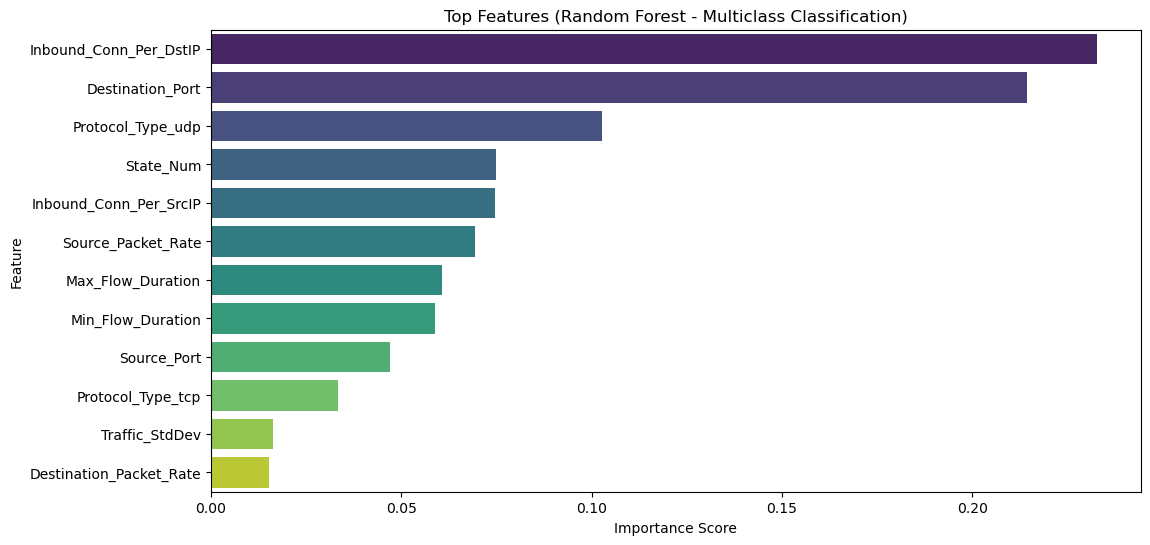

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_multiclass = df_filtered.drop(columns=["Attack_Label", "Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Normal", "Attack_Category_Reconnaissance", "Attack_Category_Theft"])  
y_multiclass = df_filtered[["Attack_Label", "Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Normal", "Attack_Category_Reconnaissance", "Attack_Category_Theft"]].idxmax(axis=1)

#MCCV
mccv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=85)
feature_importance_scores_multiclass = pd.DataFrame(index=X_multiclass.columns)

for i, (train_idx, test_idx) in enumerate(mccv.split(X_multiclass)):
    X_train, X_test = X_multiclass.iloc[train_idx], X_multiclass.iloc[test_idx]
    y_train, y_test = y_multiclass.iloc[train_idx], y_multiclass.iloc[test_idx]

    rf = RandomForestClassifier(n_estimators=100, random_state=85)
    rf.fit(X_train, y_train)

    feature_importance_scores_multiclass[f"Split_{i+1}"] = rf.feature_importances_

feature_importance_scores_multiclass["Mean_Importance"] = feature_importance_scores_multiclass.mean(axis=1)
feature_importance_scores_multiclass = feature_importance_scores_multiclass.sort_values(by="Mean_Importance", ascending=False)

print("Most Important Features for Multiclass Classification (Averaged Over MCCV Splits):")
print(feature_importance_scores_multiclass["Mean_Importance"])

plt.figure(figsize=(12, 6))
sns.barplot(y=feature_importance_scores_multiclass.index, 
            x=feature_importance_scores_multiclass["Mean_Importance"], 
            palette="viridis")
plt.title("Top Features (Random Forest - Multiclass Classification)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [76]:
df_filtered_multiclass = df_filtered.copy()
df_filtered_multiclass.drop(columns=["Traffic_StdDev", "Destination_Packet_Rate", "Protocol_Type_tcp", "Source_Port", "Min_Flow_Duration"], inplace=True)

df_filtered_multiclass.to_csv("df_filtered_multiclass.csv", index=False)
print("Updated Feature List for Multiclass:", df_filtered_multiclass.columns)

Updated Feature List for Multiclass: Index(['Destination_Port', 'Inbound_Conn_Per_SrcIP', 'State_Num',
       'Inbound_Conn_Per_DstIP', 'Source_Packet_Rate', 'Max_Flow_Duration',
       'Attack_Label', 'Protocol_Type_udp', 'Attack_Category_DDoS',
       'Attack_Category_DoS', 'Attack_Category_Normal',
       'Attack_Category_Reconnaissance', 'Attack_Category_Theft'],
      dtype='object')


# Evaluate Balance

In [26]:
import pandas as pd

df_filtered_binary = pd.read_csv("df_filtered_binary.csv")
print("Feature List:", df_filtered_binary.columns)

df_filtered_multiclass = pd.read_csv("df_filtered_multiclass.csv")
print("Feature List:", df_filtered_multiclass.columns)

Feature List: Index(['Destination_Port', 'Inbound_Conn_Per_SrcIP', 'State_Num',
       'Inbound_Conn_Per_DstIP', 'Attack_Label', 'Protocol_Type_tcp'],
      dtype='object')
Feature List: Index(['Destination_Port', 'Inbound_Conn_Per_SrcIP', 'State_Num',
       'Inbound_Conn_Per_DstIP', 'Source_Packet_Rate', 'Max_Flow_Duration',
       'Attack_Label', 'Protocol_Type_udp', 'Attack_Category_DDoS',
       'Attack_Category_DoS', 'Attack_Category_Normal',
       'Attack_Category_Reconnaissance', 'Attack_Category_Theft'],
      dtype='object')


C:\Users\SH2\AppData\Local\Temp\ipykernel_22512\1121256897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_filtered_binary["Attack_Label"], palette="coolwarm")


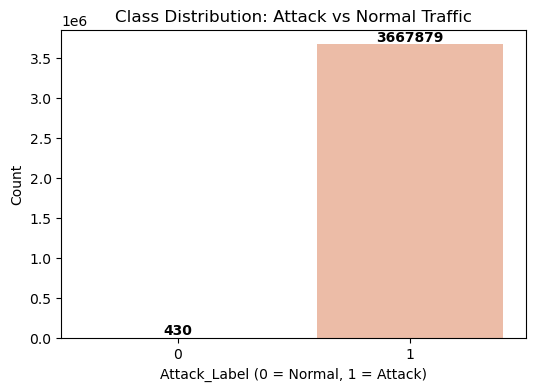

Binary Classification Class Distribution:
Attack_Label
1    0.999883
0    0.000117
Name: proportion, dtype: float64


C:\Users\SH2\AppData\Local\Temp\ipykernel_22512\1121256897.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_multiclass, palette="viridis", order=y_multiclass.value_counts().index)


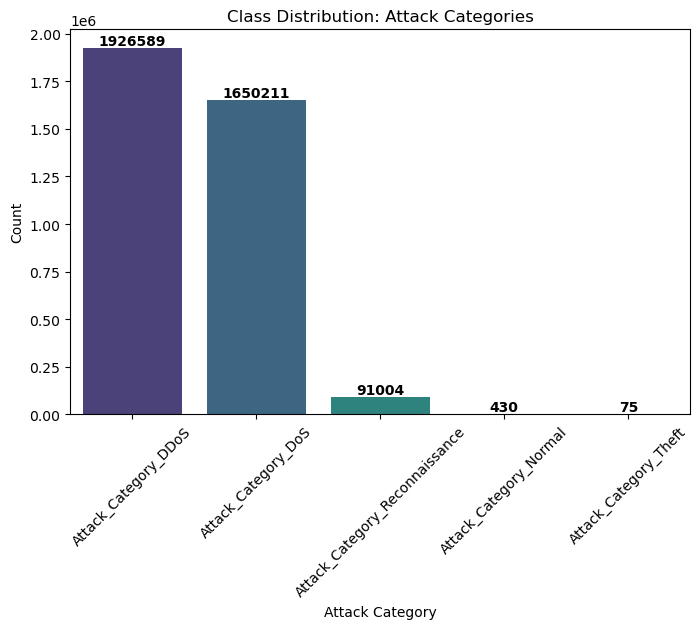


Multiclass Classification Class Distribution:
Attack_Category_DDoS              0.525198
Attack_Category_DoS               0.449856
Attack_Category_Reconnaissance    0.024808
Attack_Category_Normal            0.000117
Attack_Category_Theft             0.000020
Name: proportion, dtype: float64


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df_filtered_binary["Attack_Label"], palette="coolwarm")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title("Class Distribution: Attack vs Normal Traffic")
plt.xlabel("Attack_Label (0 = Normal, 1 = Attack)")
plt.ylabel("Count")
plt.show()
print("Binary Classification Class Distribution:")
print(df_filtered_binary["Attack_Label"].value_counts(normalize=True))



#-------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
y_multiclass = df_filtered_multiclass[
    ["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Reconnaissance", "Attack_Category_Theft", "Attack_Category_Normal"]].idxmax(axis=1)
ax = sns.countplot(x=y_multiclass, palette="viridis", order=y_multiclass.value_counts().index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title("Class Distribution: Attack Categories")
plt.xlabel("Attack Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



print("\nMulticlass Classification Class Distribution:")
print(y_multiclass.value_counts(normalize=True))

In [55]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# X_binary = df_filtered_binary.drop(columns=["Attack_Label"])
# y_binary = df_filtered_binary["Attack_Label"]

# X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=85, stratify=y_binary)

# smote_binary = SMOTE(sampling_strategy="auto", random_state=85)
# X_train_binary_resampled, y_train_binary_resampled = smote_binary.fit_resample(X_train_binary, y_train_binary)

# print("Class distribution after SMOTE (Binary Classification):")
# print(y_train_binary_resampled.value_counts(normalize=True))
 
#  #-----------------------------
# X_multiclass = df_filtered_multiclass.drop(columns=["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Reconnaissance", "Attack_Category_Theft", "Attack_Category_Normal"], errors='ignore')

# X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(X_multiclass, y_multiclass, test_size=0.2, random_state=85, stratify=y_multiclass)

# smote_multiclass = SMOTE(sampling_strategy="auto", random_state=85)
# X_train_multiclass_resampled, y_train_multiclass_resampled = smote_multiclass.fit_resample(X_train_multiclass, y_train_multiclass)

# print("Class distribution after SMOTE (Multiclass Classification):")
# print(y_train_multiclass_resampled.value_counts(normalize=True))

# Methodes

## 1. Binary Classifier for Attack Detection, (0 = Normal, 1 = Attack)

1. Logistic Regression

MCCV iteration 1/10...
MCCV iteration 2/10...
MCCV iteration 3/10...
MCCV iteration 4/10...
MCCV iteration 5/10...
MCCV iteration 6/10...
MCCV iteration 7/10...
MCCV iteration 8/10...
MCCV iteration 9/10...
MCCV iteration 10/10...

MCCV Results for Logistic Regression (Binary, Class Weighted):
                    Mean   Std Dev
Accuracy        0.973951  0.000546
Precision       1.000000  0.000000
Recall          0.973935  0.000546
F1-score        0.986796  0.000281
ROC-AUC         0.997377  0.000166
Train Accuracy  0.974148  0.000365
Train ROC-AUC   0.997328  0.000046
Mean Error      0.026049  0.000546
Std Error       0.000546  0.000546

Best Hyperparameters (Binary, Class Weighted):
{'classifier__C': 0.01, 'classifier__penalty': 'l2'}

Confusion Matrix:
               Predicted Normal  Predicted Attack
Actual Normal                86                 0
Actual Attack              3784            142932


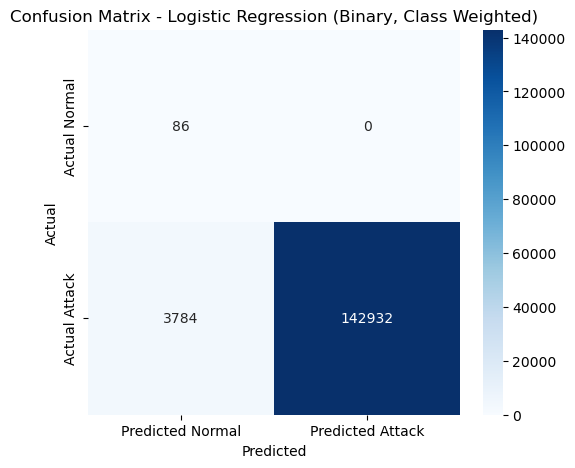

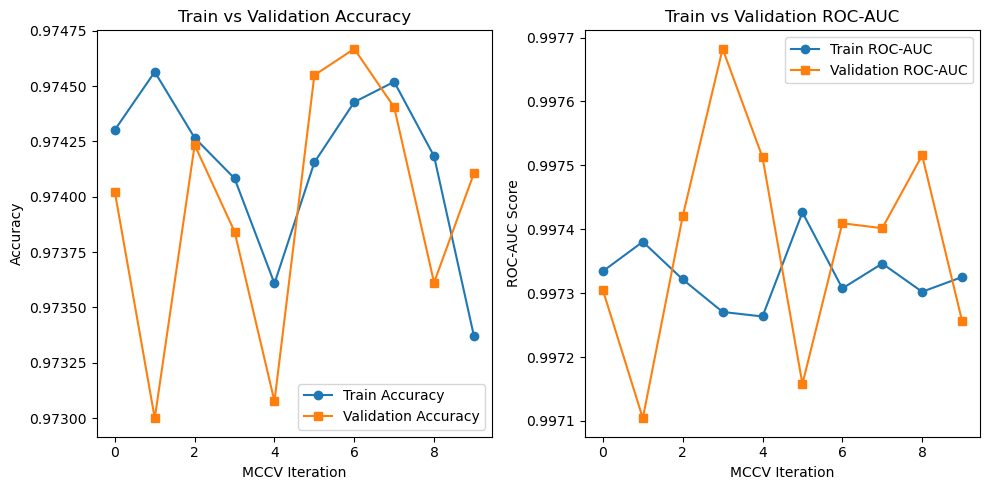

In [86]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

df_filtered_binary = pd.read_csv("df_filtered_binary.csv")

# Reduce dataset (20% of attack, keep all normal)
df_attack = df_filtered_binary[df_filtered_binary["Attack_Label"] == 1].sample(frac=0.20, random_state=85)
df_normal = df_filtered_binary[df_filtered_binary["Attack_Label"] == 0]
df_filtered_binary = pd.concat([df_attack, df_normal])

X_binary = df_filtered_binary.drop(columns=["Attack_Label", "Attack_Category_DDoS", "Attack_Category_DoS", 
                                            "Attack_Category_Normal", "Attack_Category_Reconnaissance"], errors='ignore')
y_binary = df_filtered_binary["Attack_Label"]

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, 
                                                                                random_state=85, stratify=y_binary)

mccv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=85)

param_grid = {
    "classifier__C": [0.01, 1, 100],  # Regularization strength
    "classifier__penalty": ["l1", "l2"]  # L1 (Lasso) - L2 (Ridge)
}

metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": [], 
           "Train Accuracy": [], "Train ROC-AUC": [], 
           "Best_C": [], "Best_Penalty": []}

best_model = None
best_auc = 0

#MCCV Loop
for i, (train_idx, test_idx) in enumerate(mccv.split(X_train_binary, y_train_binary)):
    print(f"MCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train, X_val = X_train_binary.iloc[train_idx], X_train_binary.iloc[test_idx]
    y_train, y_val = y_train_binary.iloc[train_idx], y_train_binary.iloc[test_idx]

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression(class_weight="balanced", solver="liblinear", max_iter=500))
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="roc_auc", n_jobs=10)
    grid_search.fit(X_train, y_train)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_iteration_model.predict(X_val)
    y_pred_prob = best_iteration_model.predict_proba(X_val)[:, 1]

    y_train_pred = best_iteration_model.predict(X_train)
    y_train_pred_prob = best_iteration_model.predict_proba(X_train)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_prob)

    train_acc = accuracy_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred_prob)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)
    metrics["Train Accuracy"].append(train_acc)
    metrics["Train ROC-AUC"].append(train_auc)
    metrics["Best_C"].append(best_params["classifier__C"])
    metrics["Best_Penalty"].append(best_params["classifier__penalty"])

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {
    metric: (np.mean(scores), np.std(scores))
    for metric, scores in metrics.items() if metric not in ["Best_C", "Best_Penalty"]
}
results["Mean Error"] = (1 - results["Accuracy"][0], results["Accuracy"][1])
results["Std Error"] = (results["Accuracy"][1], results["Accuracy"][1])

results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

if best_model:
    joblib.dump(best_model, "best_logistic_regression_binary_weighted.pkl")
results_df.to_csv("mccv_logistic_results_binary_weighted.csv")
joblib.dump(best_hyperparams, "best_logistic_hyperparams_binary_weighted.pkl")

print("\nMCCV Results for Logistic Regression (Binary, Class Weighted):")
print(results_df)
print("\nBest Hyperparameters (Binary, Class Weighted):")
print(best_hyperparams)

y_test_pred = best_model.predict(X_test_binary)

#confusion matrix
cm = confusion_matrix(y_test_binary, y_test_pred)
cm_df = pd.DataFrame(cm, index=["Actual Normal", "Actual Attack"], columns=["Predicted Normal", "Predicted Attack"])
cm_df.to_csv("confusion_matrix_binary_weighted.csv")

print("\nConfusion Matrix:")
print(cm_df)

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Binary, Class Weighted)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

#train vs validation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(metrics["Accuracy"])), metrics["Train Accuracy"], label="Train Accuracy", marker="o")
plt.plot(range(len(metrics["Accuracy"])), metrics["Accuracy"], label="Validation Accuracy", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(metrics["ROC-AUC"])), metrics["Train ROC-AUC"], label="Train ROC-AUC", marker="o")
plt.plot(range(len(metrics["ROC-AUC"])), metrics["ROC-AUC"], label="Validation ROC-AUC", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("ROC-AUC Score")
plt.title("Train vs Validation ROC-AUC")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# import joblib
# import pandas as pd

#best_model = joblib.load("best_logistic_regression_binary.pkl")
#results_df = pd.read_csv("mccv_logistic_results_binary.csv", index_col=0)
#best_hyperparams = joblib.load("best_logistic_hyperparams_binary.pkl")
#cm_df = pd.read_csv("confusion_matrix_binary_weighted.csv", index_col=0)


# print("\nMCCV Results for Logistic Regression:")
# print(results_df)

# print("\nBest Hyperparameters:")
# print(best_hyperparams)

# print("\nConfusion Matrix:")
# print(cm_df)

# plt.figure(figsize=(6,5))
# sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
# plt.title("Confusion Matrix - Logistic Regression (Binary, Class Weighted)")
# plt.ylabel("Actual")
# plt.xlabel("Predicted")
# plt.show()

2. Decision Tree


MCCV iteration 1/10...

MCCV iteration 2/10...

MCCV iteration 3/10...

MCCV iteration 4/10...

MCCV iteration 5/10...

MCCV iteration 6/10...

MCCV iteration 7/10...

MCCV iteration 8/10...

MCCV iteration 9/10...

MCCV iteration 10/10...

MCCV Results for Decision Tree (Binary, Class Weighted):
               Mean   Std Dev
Accuracy   0.999952  0.000031
Precision  0.999993  0.000005
Recall     0.999959  0.000034
F1-score   0.999976  0.000016
ROC-AUC    0.994313  0.004457

Best Hyperparameters (Binary, Class Weighted):
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Confusion Matrix:
               Predicted Normal  Predicted Attack
Actual Normal                86                 0
Actual Attack                14            146702


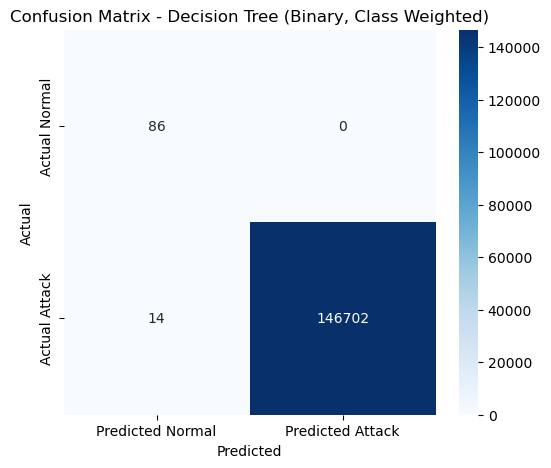

In [5]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

df_filtered_binary = pd.read_csv("df_filtered_binary.csv")

df_attack = df_filtered_binary[df_filtered_binary["Attack_Label"] == 1].sample(frac=0.20, random_state=85)
df_normal = df_filtered_binary[df_filtered_binary["Attack_Label"] == 0]
df_filtered_binary = pd.concat([df_attack, df_normal])

X_binary = df_filtered_binary.drop(columns=["Attack_Label", "Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Normal", "Attack_Category_Reconnaissance"], errors='ignore')
y_binary = df_filtered_binary["Attack_Label"]

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=85, stratify=y_binary)

mccv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=85)

param_grid = {
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": []}
best_model = None
best_auc = 0

for i, (train_idx, test_idx) in enumerate(mccv.split(X_train_binary, y_train_binary)):
    print(f"\nMCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train, X_val = X_train_binary.iloc[train_idx], X_train_binary.iloc[test_idx]
    y_train, y_val = y_train_binary.iloc[train_idx], y_train_binary.iloc[test_idx]

    dt_model = DecisionTreeClassifier(class_weight="balanced", random_state=85)

    grid_search = GridSearchCV(dt_model, param_grid, cv=3, scoring="roc_auc", n_jobs=10)
    grid_search.fit(X_train, y_train)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_iteration_model.predict(X_val)
    y_pred_prob = best_iteration_model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_prob)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {
    metric: (np.mean(scores), np.std(scores))
    for metric, scores in metrics.items()
}
results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

if best_model:
    joblib.dump(best_model, "best_decision_tree_binary_weighted.pkl")
results_df.to_csv("mccv_decision_tree_results_binary_weighted.csv")
joblib.dump(best_hyperparams, "best_decision_tree_hyperparams_binary_weighted.pkl")

print("\nMCCV Results for Decision Tree (Binary, Class Weighted):")
print(results_df)
print("\nBest Hyperparameters (Binary, Class Weighted):")
print(best_hyperparams)

y_test_pred = best_model.predict(X_test_binary)
y_test_prob = best_model.predict_proba(X_test_binary)[:, 1]

cm = confusion_matrix(y_test_binary, y_test_pred)
cm_df = pd.DataFrame(cm, index=["Actual Normal", "Actual Attack"], columns=["Predicted Normal", "Predicted Attack"])

print("\nConfusion Matrix:")
print(cm_df)

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree (Binary, Class Weighted)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

3. Random Forest

MCCV iteration 1/10...
MCCV iteration 2/10...
MCCV iteration 3/10...
MCCV iteration 4/10...
MCCV iteration 5/10...
MCCV iteration 6/10...
MCCV iteration 7/10...
MCCV iteration 8/10...
MCCV iteration 9/10...
MCCV iteration 10/10...

MCCV Results for Random Forest (Binary, Class Weighted):
               Mean   Std Dev
Accuracy   0.999948  0.000035
Precision  0.999995  0.000006
Recall     0.999953  0.000039
F1-score   0.999974  0.000017
ROC-AUC    0.998019  0.003009

Best Hyperparameters (Binary, Class Weighted):
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
               Predicted Normal  Predicted Attack
Actual Normal                86                 0
Actual Attack                16            146700


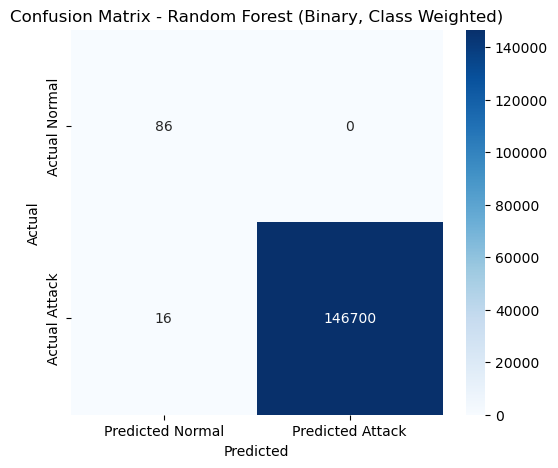

In [ ]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

df_filtered_binary = pd.read_csv("df_filtered_binary.csv")

#reduce dataset(20% of attack, keep all normal)
df_attack = df_filtered_binary[df_filtered_binary["Attack_Label"] == 1].sample(frac=0.20, random_state=85)
df_normal = df_filtered_binary[df_filtered_binary["Attack_Label"] == 0]
df_filtered_binary = pd.concat([df_attack, df_normal])

X_binary = df_filtered_binary.drop(columns=["Attack_Label", "Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Normal", "Attack_Category_Reconnaissance"], errors='ignore')
y_binary = df_filtered_binary["Attack_Label"]

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=85, stratify=y_binary)

mccv = ShuffleSplit(n_splits=10, test_HEresize=0.2, random_state=85)

param_grid = {
    "n_estimators": [50, 100, 200],   # Number of trees
    "max_depth": [None, 10, 20],  # Tree depth
    "min_samples_split": [2, 5, 10],  # Min samples to split a node
    "min_samples_leaf": [1, 2, 4]} # Min samples per leaf


metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": [], "Best_n_estimators": [], "Best_max_depth": [], "Best_min_samples_split": [], "Best_min_samples_leaf": []}
best_model = None
best_auc = 0

# MCCV Loop
for i, (train_idx, test_idx) in enumerate(mccv.split(X_train_binary, y_train_binary)):
    print(f"MCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train, X_val = X_train_binary.iloc[train_idx], X_train_binary.iloc[test_idx]
    y_train, y_val = y_train_binary.iloc[train_idx], y_train_binary.iloc[test_idx]

    rf_model = RandomForestClassifier(class_weight="balanced", random_state=85)

    grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring="roc_auc", n_jobs=10)
    grid_search.fit(X_train, y_train)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_iteration_model.predict(X_val)
    y_pred_prob = best_iteration_model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_prob)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)
    metrics["Best_n_estimators"].append(best_params["n_estimators"])
    metrics["Best_max_depth"].append(best_params["max_depth"])
    metrics["Best_min_samples_split"].append(best_params["min_samples_split"])
    metrics["Best_min_samples_leaf"].append(best_params["min_samples_leaf"])

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {
    metric: (np.mean(scores), np.std(scores))
    for metric, scores in metrics.items() if metric not in ["Best_n_estimators", "Best_max_depth", "Best_min_samples_split", "Best_min_samples_leaf"]}

results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

if best_model:
    joblib.dump(best_model, "best_random_forest_binary_weighted.pkl")
results_df.to_csv("mccv_random_forest_results_binary_weighted.csv")
joblib.dump(best_hyperparams, "best_random_forest_hyperparams_binary_weighted.pkl")

print("\nMCCV Results for Random Forest (Binary, Class Weighted):")
print(results_df)
print("\nBest Hyperparameters (Binary, Class Weighted):")
print(best_hyperparams)

y_test_pred = best_model.predict(X_test_binary)

cm = confusion_matrix(y_test_binary, y_test_pred)
cm_df = pd.DataFrame(cm, index=["Actual Normal", "Actual Attack"], columns=["Predicted Normal", "Predicted Attack"])

cm_df.to_csv("confusion_matrix_random_forest_binary_weighted.csv")

print("\nConfusion Matrix:")
print(cm_df)

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest (Binary, Class Weighted)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


4. XGBoost

MCCV iteration 1/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\xgboost\core.py:158: UserWarning: [23:50:34] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MCCV iteration 2/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\xgboost\core.py:158: UserWarning: [23:51:15] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MCCV iteration 3/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\xgboost\core.py:158: UserWarning: [23:51:56] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MCCV iteration 4/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\xgboost\core.py:158: UserWarning: [23:52:36] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MCCV iteration 5/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\xgboost\core.py:158: UserWarning: [23:53:17] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MCCV iteration 6/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\xgboost\core.py:158: UserWarning: [23:53:57] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MCCV iteration 7/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\xgboost\core.py:158: UserWarning: [23:54:38] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MCCV iteration 8/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\xgboost\core.py:158: UserWarning: [23:55:19] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MCCV iteration 9/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\xgboost\core.py:158: UserWarning: [23:56:00] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MCCV iteration 10/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\xgboost\core.py:158: UserWarning: [23:56:41] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



MCCV Results for XGBoost (Binary, Class Weighted):
               Mean   Std Dev
Accuracy   0.989087  0.003270
Precision  1.000000  0.000000
Recall     0.989081  0.003272
F1-score   0.994508  0.001651
ROC-AUC    0.999875  0.000032

Best Hyperparameters (Binary, Class Weighted):
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

Confusion Matrix:
               Predicted Normal  Predicted Attack
Actual Normal                86                 0
Actual Attack              2221            144495


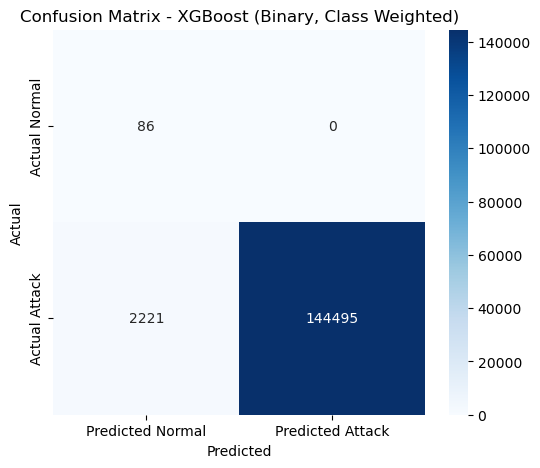

In [29]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

df_filtered_binary = pd.read_csv("df_filtered_binary.csv")

#reduce dataset(20% of attack, keep all normal)
df_attack = df_filtered_binary[df_filtered_binary["Attack_Label"] == 1].sample(frac=0.20, random_state=85)
df_normal = df_filtered_binary[df_filtered_binary["Attack_Label"] == 0]
df_filtered_binary = pd.concat([df_attack, df_normal])

X_binary = df_filtered_binary.drop(columns=["Attack_Label", "Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Normal", "Attack_Category_Reconnaissance"], errors='ignore')
y_binary = df_filtered_binary["Attack_Label"]

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=85, stratify=y_binary)

mccv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=85)

param_grid = {
    "n_estimators": [50, 100, 200],  # Number of boosting rounds
    "max_depth": [3, 5, 10],  # Tree depth
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage
    "subsample": [0.8, 1.0],  # Fraction of data used for training
    "colsample_bytree": [0.8, 1.0]}  # Fraction of features used per tree

metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": [], "Best_n_estimators": [], "Best_max_depth": [], "Best_learning_rate": [], "Best_subsample": [], "Best_colsample_bytree": []}
best_model = None
best_auc = 0

# MCCV Loop
for i, (train_idx, test_idx) in enumerate(mccv.split(X_train_binary, y_train_binary)):
    print(f"MCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train, X_val = X_train_binary.iloc[train_idx], X_train_binary.iloc[test_idx]
    y_train, y_val = y_train_binary.iloc[train_idx], y_train_binary.iloc[test_idx]

    xgb_model = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=85, use_label_encoder=False, eval_metric="logloss")

    grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring="roc_auc", n_jobs=10)
    grid_search.fit(X_train, y_train)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_iteration_model.predict(X_val)
    y_pred_prob = best_iteration_model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_prob)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)
    metrics["Best_n_estimators"].append(best_params["n_estimators"])
    metrics["Best_max_depth"].append(best_params["max_depth"])
    metrics["Best_learning_rate"].append(best_params["learning_rate"])
    metrics["Best_subsample"].append(best_params["subsample"])
    metrics["Best_colsample_bytree"].append(best_params["colsample_bytree"])

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {
    metric: (np.mean(scores), np.std(scores))
    for metric, scores in metrics.items() if metric not in ["Best_n_estimators", "Best_max_depth", "Best_learning_rate", "Best_subsample", "Best_colsample_bytree"]}

results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

if best_model:
    joblib.dump(best_model, "best_xgboost_binary_weighted.pkl")
results_df.to_csv("mccv_xgboost_results_binary_weighted.csv")
joblib.dump(best_hyperparams, "best_xgboost_hyperparams_binary_weighted.pkl")

print("\nMCCV Results for XGBoost (Binary, Class Weighted):")
print(results_df)
print("\nBest Hyperparameters (Binary, Class Weighted):")
print(best_hyperparams)

y_test_pred = best_model.predict(X_test_binary)

cm = confusion_matrix(y_test_binary, y_test_pred)
cm_df = pd.DataFrame(cm, index=["Actual Normal", "Actual Attack"], columns=["Predicted Normal", "Predicted Attack"])

cm_df.to_csv("confusion_matrix_xgboost_binary_weighted.csv")

print("\nConfusion Matrix:")
print(cm_df)

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost (Binary, Class Weighted)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


5. SVM

MCCV iteration 1/10...
MCCV iteration 2/10...
MCCV iteration 3/10...
MCCV iteration 4/10...
MCCV iteration 5/10...
MCCV iteration 6/10...
MCCV iteration 7/10...
MCCV iteration 8/10...
MCCV iteration 9/10...
MCCV iteration 10/10...

MCCV Results for SVM (Binary, Class Weighted):
               Mean   Std Dev
Accuracy   0.993951  0.000568
Precision  0.999996  0.000007
Recall     0.993952  0.000565
F1-score   0.996964  0.000286
ROC-AUC    0.999187  0.001004

Best Hyperparameters (Binary, Class Weighted):
{'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

Confusion Matrix:
               Predicted Normal  Predicted Attack
Actual Normal                84                 2
Actual Attack               907            145809


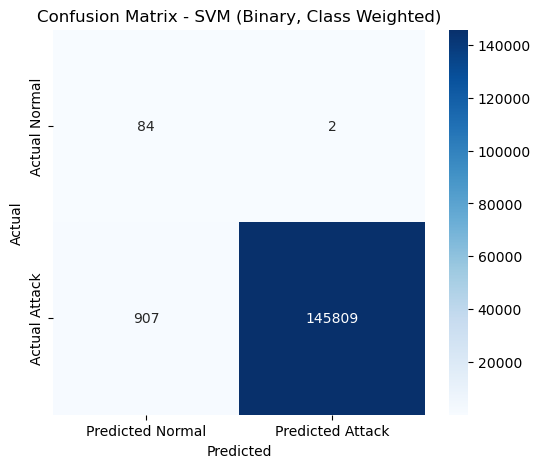

In [30]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

df_filtered_binary = pd.read_csv("df_filtered_binary.csv")

#reduce dataset(20% of attack, keep all normal)
df_attack = df_filtered_binary[df_filtered_binary["Attack_Label"] == 1].sample(frac=0.20, random_state=85)
df_normal = df_filtered_binary[df_filtered_binary["Attack_Label"] == 0]
df_filtered_binary = pd.concat([df_attack, df_normal])

X_binary = df_filtered_binary.drop(columns=["Attack_Label", "Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Normal", "Attack_Category_Reconnaissance"], errors='ignore')
y_binary = df_filtered_binary["Attack_Label"]

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=85, stratify=y_binary)

mccv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=85)

param_grid = {
    "classifier__C": [0.01, 1, 100],  
    "classifier__kernel": ["linear", "rbf"],  
    "classifier__gamma": ["scale", "auto"]
}

metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": [], "Best_C": [], "Best_Kernel": [], "Best_Gamma": []}
best_model = None
best_auc = 0

# MCCV Loop
for i, (train_idx, test_idx) in enumerate(mccv.split(X_train_binary, y_train_binary)):
    print(f"MCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train, X_val = X_train_binary.iloc[train_idx], X_train_binary.iloc[test_idx]
    y_train, y_val = y_train_binary.iloc[train_idx], y_train_binary.iloc[test_idx]

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", SVC(class_weight="balanced", probability=True))
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="roc_auc", n_jobs=10)
    grid_search.fit(X_train, y_train)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_iteration_model.predict(X_val)
    y_pred_prob = best_iteration_model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_prob)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)
    metrics["Best_C"].append(best_params["classifier__C"])
    metrics["Best_Kernel"].append(best_params["classifier__kernel"])
    metrics["Best_Gamma"].append(best_params["classifier__gamma"])

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {
    metric: (np.mean(scores), np.std(scores))
    for metric, scores in metrics.items() if metric not in ["Best_C", "Best_Kernel", "Best_Gamma"]}

results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

if best_model:
    joblib.dump(best_model, "best_svm_binary_weighted.pkl")
results_df.to_csv("mccv_svm_results_binary_weighted.csv")
joblib.dump(best_hyperparams, "best_svm_hyperparams_binary_weighted.pkl")

print("\nMCCV Results for SVM (Binary, Class Weighted):")
print(results_df)
print("\nBest Hyperparameters (Binary, Class Weighted):")
print(best_hyperparams)

y_test_pred = best_model.predict(X_test_binary)

cm = confusion_matrix(y_test_binary, y_test_pred)
cm_df = pd.DataFrame(cm, index=["Actual Normal", "Actual Attack"], columns=["Predicted Normal", "Predicted Attack"])

cm_df.to_csv("confusion_matrix_svm_binary_weighted.csv")

print("\nConfusion Matrix:")
print(cm_df)

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM (Binary, Class Weighted)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


6. LDA


MCCV iteration 1/10...

MCCV iteration 2/10...

MCCV iteration 3/10...

MCCV iteration 4/10...

MCCV iteration 5/10...

MCCV iteration 6/10...

MCCV iteration 7/10...

MCCV iteration 8/10...

MCCV iteration 9/10...

MCCV iteration 10/10...

MCCV Results for LDA (Binary):
               Mean   Std Dev
Accuracy   0.991394  0.000385
Precision  0.999873  0.000031
Recall     0.991515  0.000408
F1-score   0.995676  0.000194
ROC-AUC    0.996273  0.000676

Best Hyperparameters (Binary):
{'solver': 'svd'}

Confusion Matrix:
               Predicted Normal  Predicted Attack
Actual Normal                74                12
Actual Attack              1345            145371


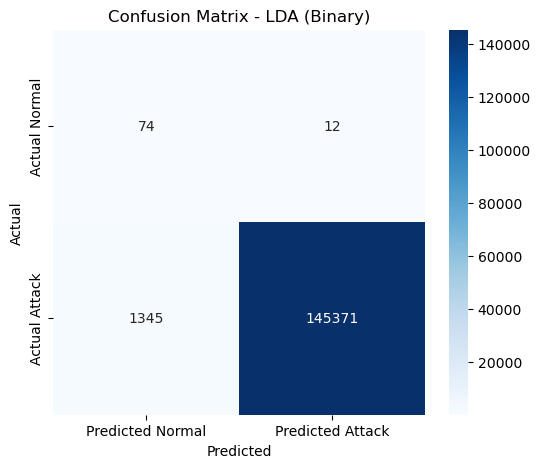

In [4]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

df_filtered_binary = pd.read_csv("df_filtered_binary.csv")

df_attack = df_filtered_binary[df_filtered_binary["Attack_Label"] == 1].sample(frac=0.20, random_state=85)
df_normal = df_filtered_binary[df_filtered_binary["Attack_Label"] == 0]
df_filtered_binary = pd.concat([df_attack, df_normal])

X_binary = df_filtered_binary.drop(columns=["Attack_Label", "Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Normal", "Attack_Category_Reconnaissance"], errors='ignore')
y_binary = df_filtered_binary["Attack_Label"]

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=85, stratify=y_binary)

mccv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=85)

param_grid = {
    "solver": ["svd", "lsqr", "eigen"]
}

metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": []}
best_model = None
best_auc = 0

for i, (train_idx, test_idx) in enumerate(mccv.split(X_train_binary, y_train_binary)):
    print(f"\nMCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train, X_val = X_train_binary.iloc[train_idx], X_train_binary.iloc[test_idx]
    y_train, y_val = y_train_binary.iloc[train_idx], y_train_binary.iloc[test_idx]

    lda_model = LinearDiscriminantAnalysis()

    grid_search = GridSearchCV(lda_model, param_grid, cv=3, scoring="roc_auc", n_jobs=10)
    grid_search.fit(X_train, y_train)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_iteration_model.predict(X_val)
    y_pred_prob = best_iteration_model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_prob)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {metric: (np.mean(scores), np.std(scores)) for metric, scores in metrics.items()}
results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

if best_model:
    joblib.dump(best_model, "best_lda_binary_weighted.pkl")
results_df.to_csv("mccv_lda_results_binary_weighted.csv")
joblib.dump(best_hyperparams, "best_lda_hyperparams_binary_weighted.pkl")

print("\nMCCV Results for LDA (Binary):")
print(results_df)
print("\nBest Hyperparameters (Binary):")
print(best_hyperparams)

y_test_pred = best_model.predict(X_test_binary)
y_test_prob = best_model.predict_proba(X_test_binary)[:, 1]

cm = confusion_matrix(y_test_binary, y_test_pred)
cm_df = pd.DataFrame(cm, index=["Actual Normal", "Actual Attack"], columns=["Predicted Normal", "Predicted Attack"])

print("\nConfusion Matrix:")
print(cm_df)

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - LDA (Binary)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


## 2. Multi-Class Attack Type Classification.
We are going to apply SMOTE to balance dataset for Attack Type Classifications

1. Logistic Regression

C:\Users\SH2\AppData\Local\Temp\ipykernel_22512\3381209706.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_multiclass, palette="viridis", order=y_multiclass.value_counts().index)


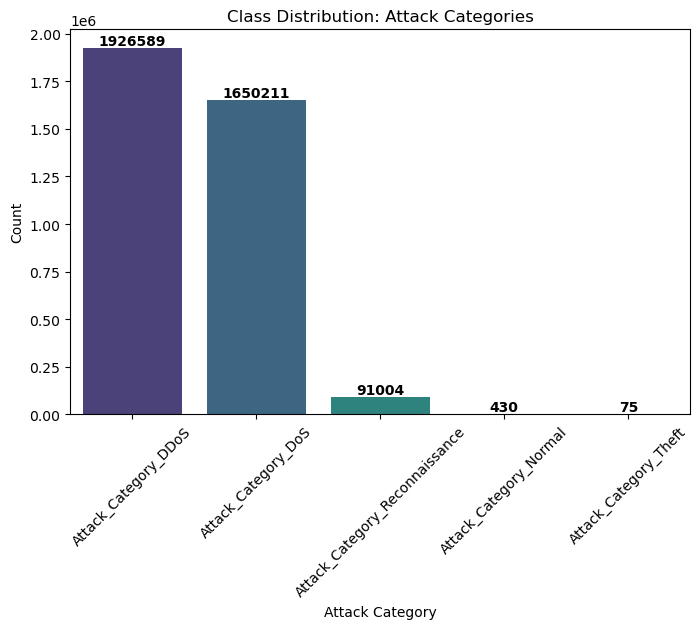

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df_filtered_multiclass = pd.read_csv("df_filtered_multiclass.csv")

plt.figure(figsize=(8, 5))
y_multiclass = df_filtered_multiclass[["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Reconnaissance", "Attack_Category_Theft"]].idxmax(axis=1)

ax = sns.countplot(x=y_multiclass, palette="viridis", order=y_multiclass.value_counts().index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Class Distribution: Attack Categories")
plt.xlabel("Attack Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Attack Category Counts (Before Sampling):
DDoS = 1,926,589
DoS  = 1,650,211
Reconnaissance = 91,004
Theft = 75

After Sampling (target_size=250000):
DDoS = 250,000
DoS  = 250,000
Reconnaissance = 250,000
Theft = 250,000

MCCV iteration 1/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



MCCV iteration 2/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



MCCV iteration 3/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



MCCV iteration 4/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



MCCV iteration 5/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



MCCV iteration 6/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



MCCV iteration 7/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



MCCV iteration 8/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



MCCV iteration 9/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



MCCV iteration 10/10...


c:\Users\SH2\.conda\envs\ISYE\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



MCCV Results for Logistic Regression:
                    Mean   Std Dev
Accuracy        0.865423  0.004814
Precision       0.875545  0.005002
Recall          0.865423  0.004814
F1-score        0.861537  0.005597
ROC-AUC         0.965099  0.002377
Train Accuracy  0.864753  0.004717
Train ROC-AUC   0.964855  0.002457
Mean Error      0.134577  0.004814
Std Error       0.004814  0.004814

Best Hyperparameters:
{'C': 1, 'penalty': 'l2'}

Confusion Matrix (Test Set):
                                Attack_Category_DDoS  Attack_Category_DoS  \
Attack_Category_DDoS                           47973                21538   
Attack_Category_DoS                             6781                67191   
Attack_Category_Reconnaissance                   375                 2631   
Attack_Category_Theft                              0                    0   

                                Attack_Category_Reconnaissance  \
Attack_Category_DDoS                                      5473   
Attack_Categor

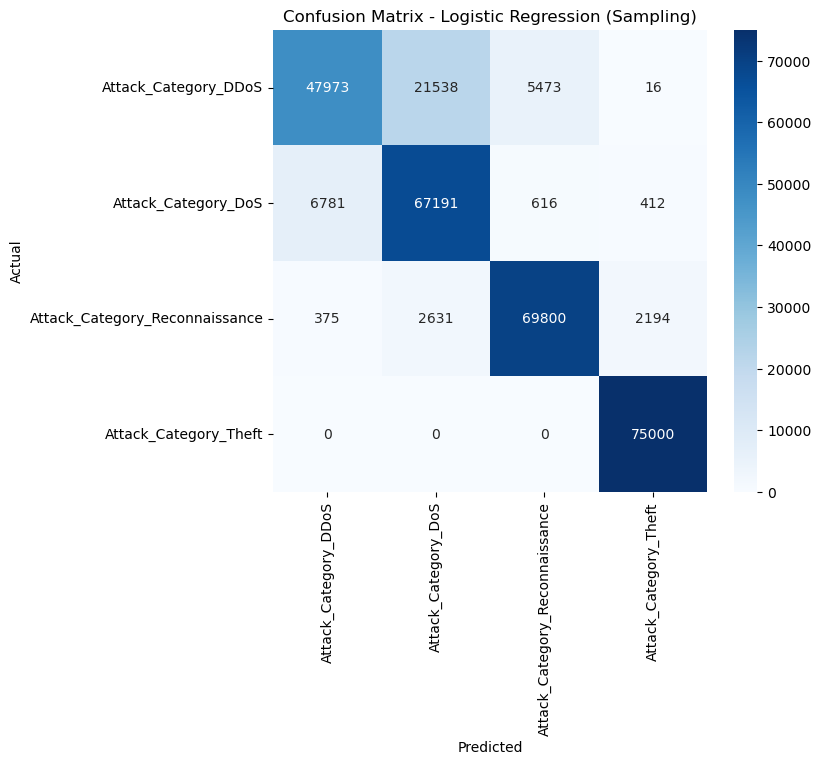

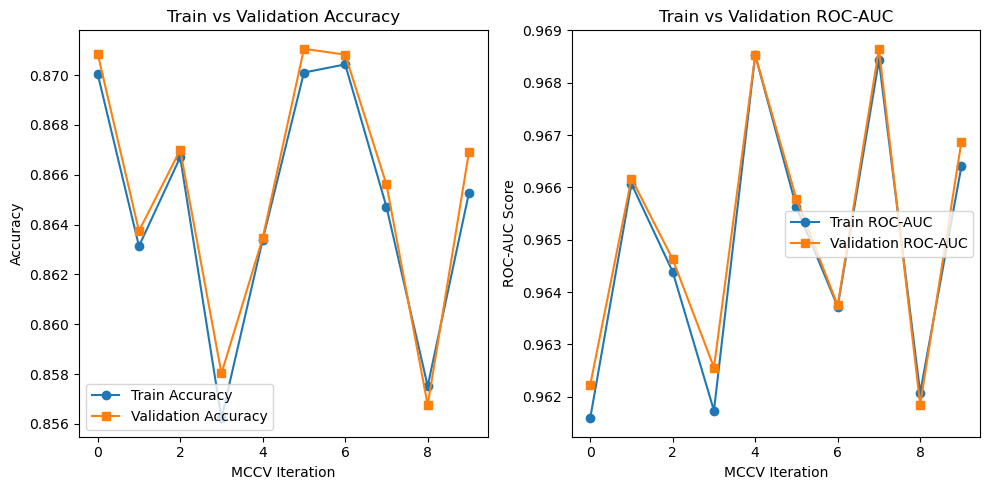

In [16]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.utils import resample

df = pd.read_csv("df_filtered_multiclass.csv")


df_attacks = df[df["Attack_Label"] == 1].copy()
df_attacks.drop(columns=["Attack_Label", "Attack_Category_Normal"], errors="ignore", inplace=True)

#each attack category
df_ddos  = df_attacks[df_attacks["Attack_Category_DDoS"] == 1]
df_dos   = df_attacks[df_attacks["Attack_Category_DoS"] == 1]
df_recon = df_attacks[df_attacks["Attack_Category_Reconnaissance"] == 1]
df_theft = df_attacks[df_attacks["Attack_Category_Theft"] == 1]

print("\nAttack Category Counts (Before Sampling):")
print(f"DDoS = {len(df_ddos):,}")
print(f"DoS  = {len(df_dos):,}")
print(f"Reconnaissance = {len(df_recon):,}")
print(f"Theft = {len(df_theft):,}")

#sampling
def hybrid_sample(df_class, target_size):
    size = len(df_class)
    if size > target_size:
        return resample(df_class, replace=False, n_samples=target_size, random_state=85)
    elif size < target_size:
        return resample(df_class, replace=True, n_samples=target_size, random_state=85)
    else:
        return df_class

target_size = 250000  # for sample

df_ddos_bal  = hybrid_sample(df_ddos,  target_size)
df_dos_bal   = hybrid_sample(df_dos,   target_size)
df_recon_bal = hybrid_sample(df_recon, target_size)
df_theft_bal = hybrid_sample(df_theft, target_size)

df_balanced = pd.concat([df_ddos_bal, df_dos_bal, df_recon_bal, df_theft_bal], ignore_index=True)

print(f"\nAfter Sampling (target_size={target_size}):")
print(f"DDoS = {len(df_ddos_bal):,}")
print(f"DoS  = {len(df_dos_bal):,}")
print(f"Reconnaissance = {len(df_recon_bal):,}")
print(f"Theft = {len(df_theft_bal):,}")

#Multi-Class
y_multiclass = df_balanced[["Attack_Category_DDoS", "Attack_Category_DoS", 
                            "Attack_Category_Reconnaissance", "Attack_Category_Theft"]].idxmax(axis=1)
X_multiclass = df_balanced.drop(columns=["Attack_Category_DDoS", "Attack_Category_DoS", 
                                         "Attack_Category_Reconnaissance", "Attack_Category_Theft"], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X_multiclass, y_multiclass, test_size=0.3, random_state=85, stratify=y_multiclass)


#Monte Carlo CV
mccv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=85)

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"]}

metrics = {
    "Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": [],
    "Train Accuracy": [], "Train ROC-AUC": [],
    "Best_C": [], "Best_penalty": []}

best_model = None
best_auc = 0
class_labels = np.unique(y_train)

for i, (train_idx, test_idx) in enumerate(mccv.split(X_train, y_train)):
    print(f"\nMCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train_mccv, X_val_mccv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_mccv, y_val_mccv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    log_reg = LogisticRegression(
        multi_class="ovr", solver="liblinear", class_weight="balanced", max_iter=500, random_state=85)

    grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy", n_jobs=10)
    grid_search.fit(X_train_mccv, y_train_mccv)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_train_pred = best_iteration_model.predict(X_train_mccv)


    y_train_prob = best_iteration_model.predict_proba(X_train_mccv)
    train_acc = accuracy_score(y_train_mccv, y_train_pred)
    train_auc = roc_auc_score(y_train_mccv, y_train_prob, multi_class="ovr", average="weighted", labels=class_labels)

    y_val_pred = best_iteration_model.predict(X_val_mccv)
    y_val_prob = best_iteration_model.predict_proba(X_val_mccv)
    acc = accuracy_score(y_val_mccv, y_val_pred)
    prec = precision_score(y_val_mccv, y_val_pred, average="weighted")
    rec = recall_score(y_val_mccv, y_val_pred, average="weighted")
    f1 = f1_score(y_val_mccv, y_val_pred, average="weighted")
    auc = roc_auc_score(y_val_mccv, y_val_prob, multi_class="ovr", average="weighted", labels=class_labels)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)
    metrics["Train Accuracy"].append(train_acc)
    metrics["Train ROC-AUC"].append(train_auc)

    metrics["Best_C"].append(best_params["C"])
    metrics["Best_penalty"].append(best_params["penalty"])

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {
    metric: (np.mean(scores), np.std(scores))
    for metric, scores in metrics.items()
    if metric not in ["Best_C", "Best_penalty"]
}
results["Mean Error"] = (1 - results["Accuracy"][0], results["Accuracy"][1])
results["Std Error"] = (results["Accuracy"][1], results["Accuracy"][1])

results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

print("\nMCCV Results for Logistic Regression:")
print(results_df)

print("\nBest Hyperparameters:")
print(best_hyperparams)
joblib.dump(best_model, "best_logistic_regression_multiclass_attacks.pkl")
joblib.dump(best_hyperparams, "best_logistic_hyperparams_multiclass_attacks.pkl")

y_test_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=class_labels)
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (Test Set):")
print(cm_df)

plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Sampling)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(metrics["Accuracy"])), metrics["Train Accuracy"], label="Train Accuracy", marker="o")
plt.plot(range(len(metrics["Accuracy"])), metrics["Accuracy"], label="Validation Accuracy", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(metrics["ROC-AUC"])), metrics["Train ROC-AUC"], label="Train ROC-AUC", marker="o")
plt.plot(range(len(metrics["ROC-AUC"])), metrics["ROC-AUC"], label="Validation ROC-AUC", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("ROC-AUC Score")
plt.title("Train vs Validation ROC-AUC")
plt.legend()

plt.tight_layout()
plt.show()

2. Decision Tree

\Attack Category Counts (Before Sampling):
DDoS = 1,926,589
DoS  = 1,650,211
Reconnaissance = 91,004
Theft = 75

After Sampling (target_size=250000):
DDoS = 250,000
DoS  = 250,000
Reconnaissance = 250,000
Theft = 250,000

MCCV iteration 1/10...

MCCV iteration 2/10...

MCCV iteration 3/10...

MCCV iteration 4/10...

MCCV iteration 5/10...

MCCV iteration 6/10...

MCCV iteration 7/10...

MCCV iteration 8/10...

MCCV iteration 9/10...

MCCV iteration 10/10...

MCCV Results for Decision Tree (Sampling):
                    Mean   Std Dev
Accuracy        0.983039  0.000189
Precision       0.983197  0.000177
Recall          0.983039  0.000189
F1-score        0.983019  0.000190
ROC-AUC         0.988694  0.000125
Train Accuracy  0.983123  0.000048
Train ROC-AUC   0.988748  0.000033
Mean Error      0.016961  0.000189
Std Error       0.000189  0.000189

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

Confusion Matrix (Test Set):
                          

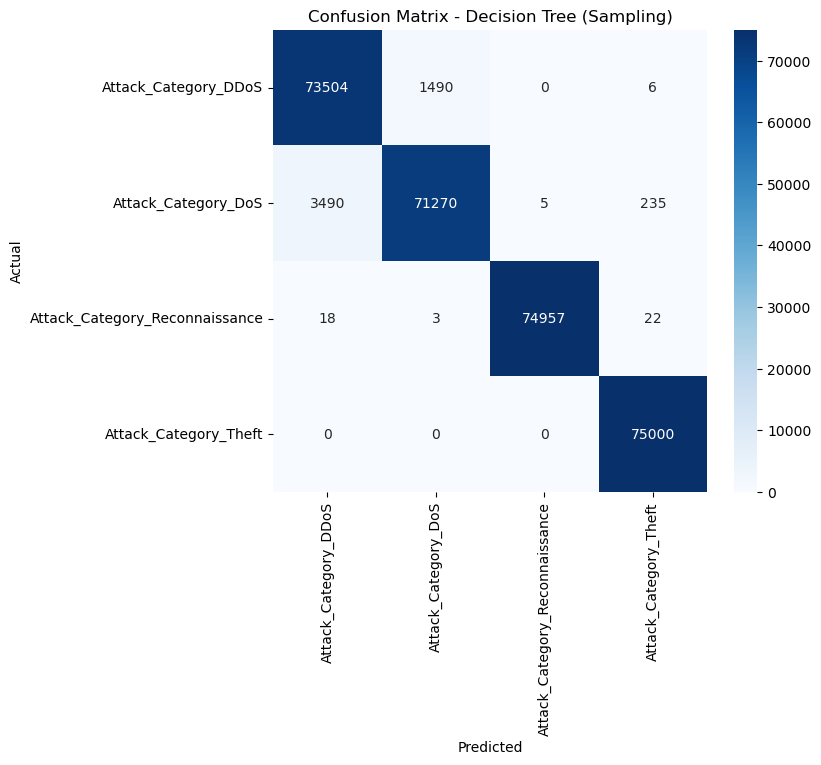

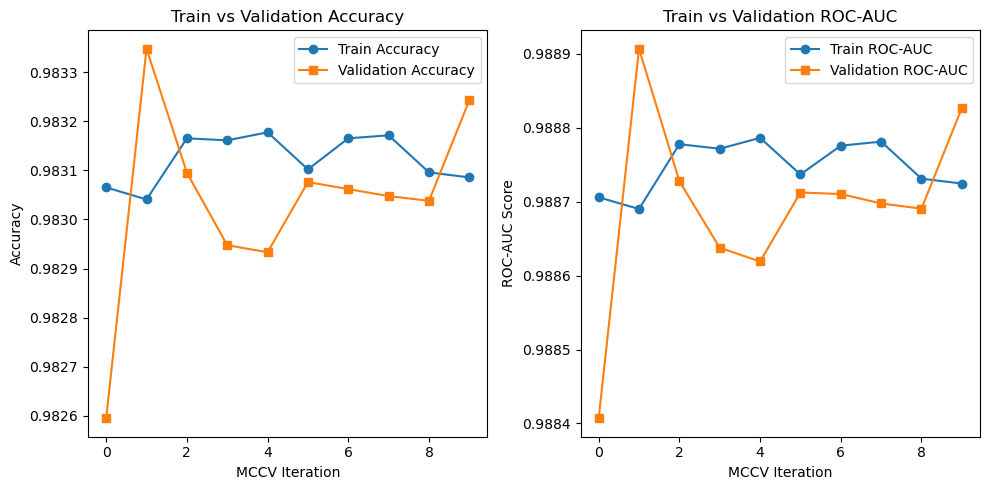

In [24]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.utils import resample

df = pd.read_csv("df_filtered_multiclass.csv")

df_attacks = df[df["Attack_Label"] == 1].copy()
df_attacks.drop(columns=["Attack_Label", "Attack_Category_Normal"], errors="ignore", inplace=True)

df_ddos  = df_attacks[df_attacks["Attack_Category_DDoS"] == 1]
df_dos   = df_attacks[df_attacks["Attack_Category_DoS"] == 1]
df_recon = df_attacks[df_attacks["Attack_Category_Reconnaissance"] == 1]
df_theft = df_attacks[df_attacks["Attack_Category_Theft"] == 1]

print("\Attack Category Counts (Before Sampling):")
print(f"DDoS = {len(df_ddos):,}")
print(f"DoS  = {len(df_dos):,}")
print(f"Reconnaissance = {len(df_recon):,}")
print(f"Theft = {len(df_theft):,}")

def hybrid_sample(df_class, target_size):
    size = len(df_class)
    if size > target_size:
        return resample(df_class, replace=False, n_samples=target_size, random_state=85)
    elif size < target_size:
        return resample(df_class, replace=True, n_samples=target_size, random_state=85)
    else:
        return df_class

target_size = 250000

df_ddos_bal  = hybrid_sample(df_ddos,  target_size)
df_dos_bal   = hybrid_sample(df_dos,   target_size)
df_recon_bal = hybrid_sample(df_recon, target_size)
df_theft_bal = hybrid_sample(df_theft, target_size)

df_balanced = pd.concat([df_ddos_bal, df_dos_bal, df_recon_bal, df_theft_bal], ignore_index=True)

print(f"\nAfter Sampling (target_size={target_size}):")
print(f"DDoS = {len(df_ddos_bal):,}")
print(f"DoS  = {len(df_dos_bal):,}")
print(f"Reconnaissance = {len(df_recon_bal):,}")
print(f"Theft = {len(df_theft_bal):,}")

y_multiclass = df_balanced[["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Reconnaissance", "Attack_Category_Theft"]].idxmax(axis=1)
X_multiclass = df_balanced.drop(columns=["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Reconnaissance", "Attack_Category_Theft"], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X_multiclass, y_multiclass, test_size=0.3, random_state=85, stratify=y_multiclass)

mccv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=85)

param_grid = {
    "max_depth": [5, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 4]
}

metrics = {
    "Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": [],
    "Train Accuracy": [], "Train ROC-AUC": []
}

best_model = None
best_auc = 0
class_labels = np.unique(y_train)

for i, (train_idx, test_idx) in enumerate(mccv.split(X_train, y_train)):
    print(f"\nMCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train_mccv, X_val_mccv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_mccv, y_val_mccv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    tree = DecisionTreeClassifier(class_weight="balanced", random_state=85)

    grid_search = GridSearchCV(tree, param_grid, cv=5, scoring="accuracy", n_jobs=10)
    grid_search.fit(X_train_mccv, y_train_mccv)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_train_pred = best_iteration_model.predict(X_train_mccv)
    y_train_prob = (
        pd.get_dummies(y_train_pred) if len(np.unique(y_train_mccv)) > 2
        else best_iteration_model.predict_proba(X_train_mccv)
    )
    train_acc = accuracy_score(y_train_mccv, y_train_pred)
    train_auc = roc_auc_score(y_train_mccv, y_train_prob, multi_class="ovr", average="weighted", labels=class_labels)

    y_val_pred = best_iteration_model.predict(X_val_mccv)
    y_val_prob = (
        pd.get_dummies(y_val_pred) if len(np.unique(y_val_mccv)) > 2
        else best_iteration_model.predict_proba(X_val_mccv)
    )
    acc = accuracy_score(y_val_mccv, y_val_pred)
    prec = precision_score(y_val_mccv, y_val_pred, average="weighted")
    rec = recall_score(y_val_mccv, y_val_pred, average="weighted")
    f1 = f1_score(y_val_mccv, y_val_pred, average="weighted")
    auc = roc_auc_score(y_val_mccv, y_val_prob, multi_class="ovr", average="weighted", labels=class_labels)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)
    metrics["Train Accuracy"].append(train_acc)
    metrics["Train ROC-AUC"].append(train_auc)

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {
    metric: (np.mean(scores), np.std(scores))
    for metric, scores in metrics.items()
}
results["Mean Error"] = (1 - results["Accuracy"][0], results["Accuracy"][1])
results["Std Error"] = (results["Accuracy"][1], results["Accuracy"][1])

results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

print("\nMCCV Results for Decision Tree (Sampling):")
print(results_df)

print("\nBest Hyperparameters:")
print(best_hyperparams)
joblib.dump(best_model, "best_decision_tree_multiclass_attacks.pkl")
joblib.dump(best_hyperparams, "best_decision_tree_hyperparams_multiclass_attacks.pkl")

y_test_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=class_labels)
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (Test Set):")
print(cm_df)

plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree (Sampling)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(metrics["Accuracy"])), metrics["Train Accuracy"], label="Train Accuracy", marker="o")
plt.plot(range(len(metrics["Accuracy"])), metrics["Accuracy"], label="Validation Accuracy", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(metrics["ROC-AUC"])), metrics["Train ROC-AUC"], label="Train ROC-AUC", marker="o")
plt.plot(range(len(metrics["ROC-AUC"])), metrics["ROC-AUC"], label="Validation ROC-AUC", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("ROC-AUC Score")
plt.title("Train vs Validation ROC-AUC")
plt.legend()

plt.tight_layout()
plt.show()


3. Random Forest

\Attack Category Counts (Before Sampling):
DDoS = 1,926,589
DoS  = 1,650,211
Reconnaissance = 91,004
Theft = 75

After Sampling (target_size=250000):
DDoS = 250,000
DoS  = 250,000
Reconnaissance = 250,000
Theft = 250,000

MCCV iteration 1/10...

MCCV iteration 2/10...

MCCV iteration 3/10...

MCCV iteration 4/10...

MCCV iteration 5/10...

MCCV iteration 6/10...

MCCV iteration 7/10...

MCCV iteration 8/10...

MCCV iteration 9/10...

MCCV iteration 10/10...

MCCV Results for Random Forest:
                    Mean   Std Dev
Accuracy        0.988647  0.001424
Precision       0.988676  0.001367
Recall          0.988647  0.001424
F1-score        0.988647  0.001424
ROC-AUC         0.999683  0.000024
Train Accuracy  0.988781  0.001386
Train ROC-AUC   0.999693  0.000028
Mean Error      0.011353  0.001424
Std Error       0.001424  0.001424

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Confusion Matrix (Test Set):
               

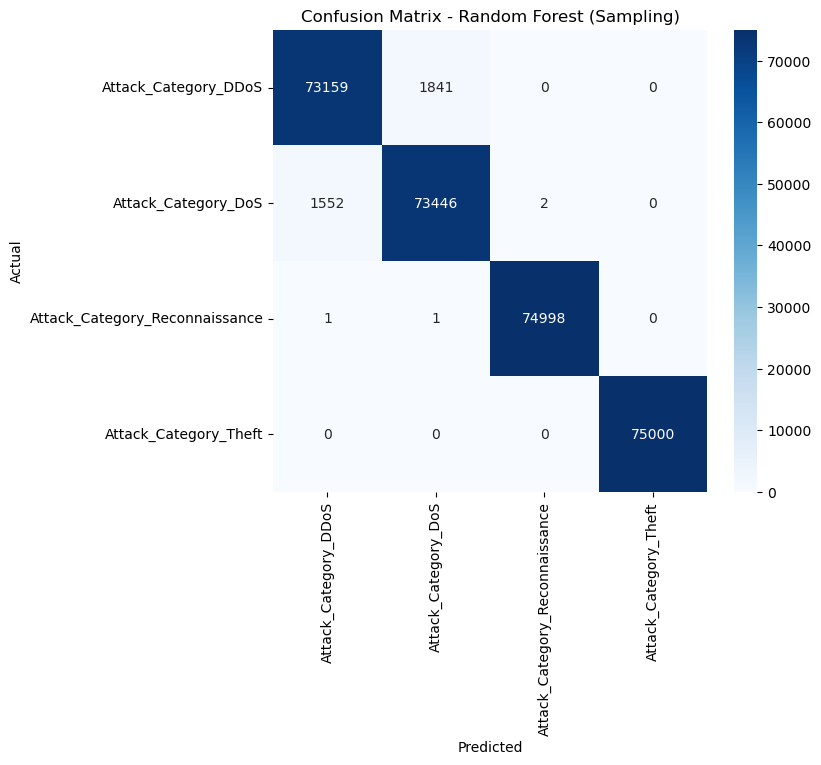

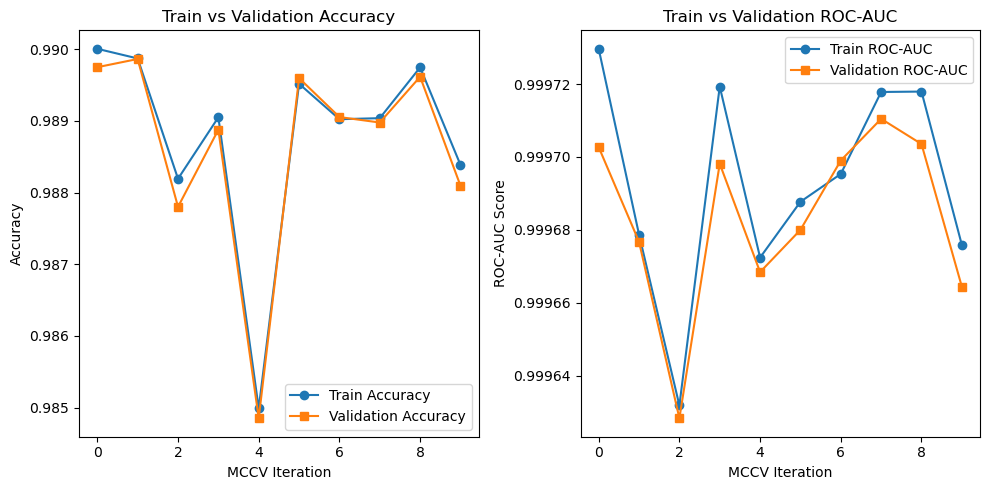

In [13]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.utils import resample

df = pd.read_csv("df_filtered_multiclass.csv")


df_attacks = df[df["Attack_Label"] == 1].copy()
df_attacks.drop(columns=["Attack_Label", "Attack_Category_Normal"], errors="ignore", inplace=True)

#each attack category
df_ddos  = df_attacks[df_attacks["Attack_Category_DDoS"] == 1]
df_dos   = df_attacks[df_attacks["Attack_Category_DoS"] == 1]
df_recon = df_attacks[df_attacks["Attack_Category_Reconnaissance"] == 1]
df_theft = df_attacks[df_attacks["Attack_Category_Theft"] == 1]

print("\Attack Category Counts (Before Sampling):")
print(f"DDoS = {len(df_ddos):,}")
print(f"DoS  = {len(df_dos):,}")
print(f"Reconnaissance = {len(df_recon):,}")
print(f"Theft = {len(df_theft):,}")

#sampling
def hybrid_sample(df_class, target_size):
    size = len(df_class)
    if size > target_size:
        return resample(df_class, replace=False, n_samples=target_size, random_state=85)
    elif size < target_size:
        return resample(df_class, replace=True, n_samples=target_size, random_state=85)
    else:
        return df_class

target_size = 250000  # for sample

df_ddos_bal  = hybrid_sample(df_ddos,  target_size)
df_dos_bal   = hybrid_sample(df_dos,   target_size)
df_recon_bal = hybrid_sample(df_recon, target_size)
df_theft_bal = hybrid_sample(df_theft, target_size)

df_balanced = pd.concat([df_ddos_bal, df_dos_bal, df_recon_bal, df_theft_bal], ignore_index=True)

print(f"\nAfter Sampling (target_size={target_size}):")
print(f"DDoS = {len(df_ddos_bal):,}")
print(f"DoS  = {len(df_dos_bal):,}")
print(f"Reconnaissance = {len(df_recon_bal):,}")
print(f"Theft = {len(df_theft_bal):,}")


#Multi-Class
y_multiclass = df_balanced[["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Reconnaissance", "Attack_Category_Theft"]].idxmax(axis=1)
X_multiclass = df_balanced.drop(columns=["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Reconnaissance", "Attack_Category_Theft"], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X_multiclass, y_multiclass, test_size=0.3, random_state=85, stratify=y_multiclass)


#Monte Carlo CV
mccv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=85)

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [5, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 4]}

metrics = {
    "Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": [],
    "Train Accuracy": [], "Train ROC-AUC": [],
    "Best_n_estimators": [], "Best_max_depth": [], "Best_min_samples_split": [], "Best_min_samples_leaf": []}

best_model = None
best_auc = 0
class_labels = np.unique(y_train)

for i, (train_idx, test_idx) in enumerate(mccv.split(X_train, y_train)):
    print(f"\nMCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train_mccv, X_val_mccv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_mccv, y_val_mccv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    rf = RandomForestClassifier(class_weight="balanced", random_state=85)

    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=10)
    grid_search.fit(X_train_mccv, y_train_mccv)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_train_pred = best_iteration_model.predict(X_train_mccv)
    y_train_prob = best_iteration_model.predict_proba(X_train_mccv)
    train_acc = accuracy_score(y_train_mccv, y_train_pred)
    train_auc = roc_auc_score(y_train_mccv, y_train_prob, multi_class="ovr", average="weighted", labels=class_labels)

    y_val_pred = best_iteration_model.predict(X_val_mccv)
    y_val_prob = best_iteration_model.predict_proba(X_val_mccv)
    acc = accuracy_score(y_val_mccv, y_val_pred)
    prec = precision_score(y_val_mccv, y_val_pred, average="weighted")
    rec = recall_score(y_val_mccv, y_val_pred, average="weighted")
    f1 = f1_score(y_val_mccv, y_val_pred, average="weighted")
    auc = roc_auc_score(y_val_mccv, y_val_prob, multi_class="ovr", average="weighted", labels=class_labels)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)
    metrics["Train Accuracy"].append(train_acc)
    metrics["Train ROC-AUC"].append(train_auc)

    metrics["Best_n_estimators"].append(best_params["n_estimators"])
    metrics["Best_max_depth"].append(best_params["max_depth"])
    metrics["Best_min_samples_split"].append(best_params["min_samples_split"])
    metrics["Best_min_samples_leaf"].append(best_params["min_samples_leaf"])

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {
    metric: (np.mean(scores), np.std(scores))
    for metric, scores in metrics.items()
    if metric not in ["Best_n_estimators", "Best_max_depth", "Best_min_samples_split", "Best_min_samples_leaf"]
}
results["Mean Error"] = (1 - results["Accuracy"][0], results["Accuracy"][1])
results["Std Error"] = (results["Accuracy"][1], results["Accuracy"][1])

results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

print("\nMCCV Results for Random Forest:")
print(results_df)

print("\nBest Hyperparameters:")
print(best_hyperparams)
joblib.dump(best_model, "best_random_forest_multiclass_attacks.pkl")
joblib.dump(best_hyperparams, "best_rf_hyperparams_multiclass_attacks.pkl")


y_test_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=class_labels)
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (Test Set):")
print(cm_df)

plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest (Sampling)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(metrics["Accuracy"])), metrics["Train Accuracy"], label="Train Accuracy", marker="o")
plt.plot(range(len(metrics["Accuracy"])), metrics["Accuracy"], label="Validation Accuracy", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(metrics["ROC-AUC"])), metrics["Train ROC-AUC"], label="Train ROC-AUC", marker="o")
plt.plot(range(len(metrics["ROC-AUC"])), metrics["ROC-AUC"], label="Validation ROC-AUC", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("ROC-AUC Score")
plt.title("Train vs Validation ROC-AUC")
plt.legend()

plt.tight_layout()
plt.show()

4. XGBoost


Attack Category Counts (Before Sampling):
DDoS = 1,926,589
DoS  = 1,650,211
Reconnaissance = 91,004
Theft = 75

After Sampling (target_size=250000):
DDoS = 250,000
DoS  = 250,000
Reconnaissance = 250,000
Theft = 250,000

MCCV iteration 1/10...

MCCV iteration 2/10...

MCCV iteration 3/10...

MCCV iteration 4/10...

MCCV iteration 5/10...

MCCV iteration 6/10...

MCCV iteration 7/10...

MCCV iteration 8/10...

MCCV iteration 9/10...

MCCV iteration 10/10...

MCCV Results for XGBoost:
                    Mean   Std Dev
Accuracy        0.995517  0.000079
Precision       0.995522  0.000079
Recall          0.995517  0.000079
F1-score        0.995517  0.000079
ROC-AUC         0.999956  0.000002
Train Accuracy  0.995748  0.000092
Train ROC-AUC   0.999962  0.000002
Mean Error      0.004483  0.000079
Std Error       0.000079  0.000079

Best Hyperparameters:
{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}

Confusion Matrix (Test Set):
       0      1      2      3
0  74208    792  

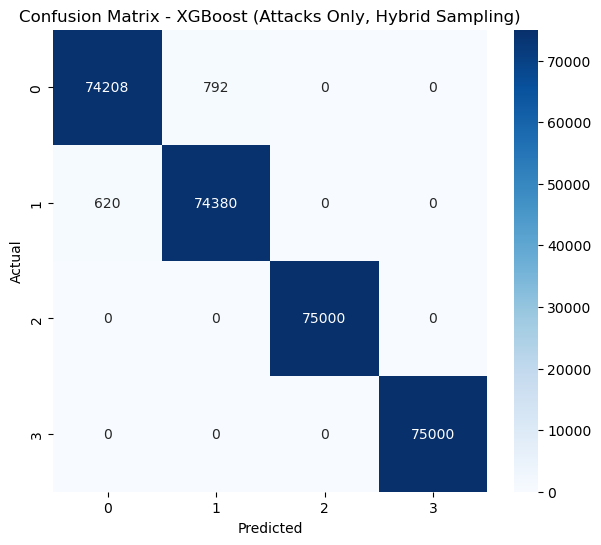

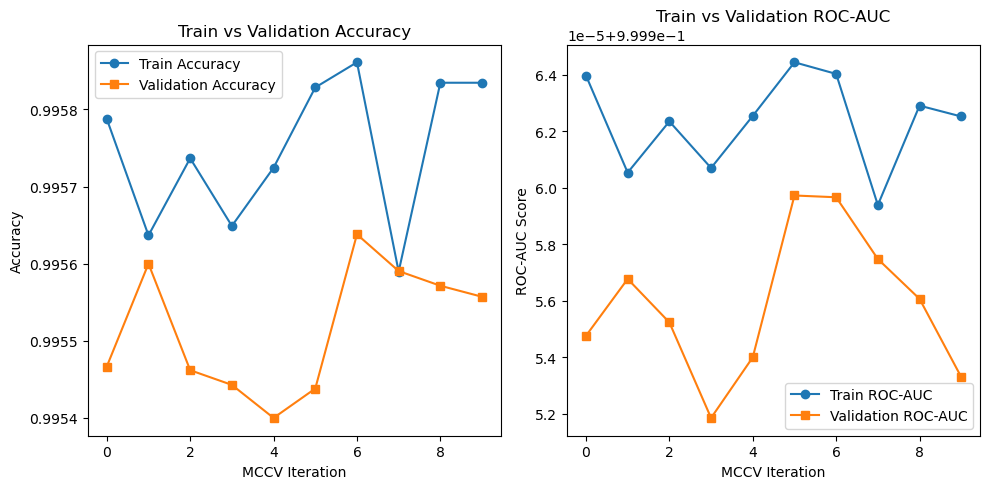

In [15]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix)
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("df_filtered_multiclass.csv")

df_attacks = df[df["Attack_Label"] == 1].copy()
df_attacks.drop(columns=["Attack_Label", "Attack_Category_Normal"], errors="ignore", inplace=True)

#each attack category
df_ddos  = df_attacks[df_attacks["Attack_Category_DDoS"] == 1]
df_dos   = df_attacks[df_attacks["Attack_Category_DoS"] == 1]
df_recon = df_attacks[df_attacks["Attack_Category_Reconnaissance"] == 1]
df_theft = df_attacks[df_attacks["Attack_Category_Theft"] == 1]

print("\nAttack Category Counts (Before Sampling):")
print(f"DDoS = {len(df_ddos):,}")
print(f"DoS  = {len(df_dos):,}")
print(f"Reconnaissance = {len(df_recon):,}")
print(f"Theft = {len(df_theft):,}")


#sampling
def hybrid_sample(df_class, target_size):
    size = len(df_class)
    if size > target_size:
        return resample(df_class, replace=False, n_samples=target_size, random_state=85)
    elif size < target_size:
        return resample(df_class, replace=True, n_samples=target_size, random_state=85)
    else:
        return df_class

target_size = 250000  # for sample

df_ddos_bal  = hybrid_sample(df_ddos,  target_size)
df_dos_bal   = hybrid_sample(df_dos,   target_size)
df_recon_bal = hybrid_sample(df_recon, target_size)
df_theft_bal = hybrid_sample(df_theft, target_size)

df_balanced = pd.concat([df_ddos_bal, df_dos_bal, df_recon_bal, df_theft_bal], ignore_index=True)

print(f"\nAfter Sampling (target_size={target_size}):")
print(f"DDoS = {len(df_ddos_bal):,}")
print(f"DoS  = {len(df_dos_bal):,}")
print(f"Reconnaissance = {len(df_recon_bal):,}")
print(f"Theft = {len(df_theft_bal):,}")


#Multi-Class
y_str = df_balanced[["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Reconnaissance", "Attack_Category_Theft"]].idxmax(axis=1)
label_encoder = LabelEncoder()
y_multiclass = label_encoder.fit_transform(y_str)

X_multiclass = df_balanced.drop(columns=["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Reconnaissance", "Attack_Category_Theft"], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X_multiclass, y_multiclass, test_size=0.3, random_state=85, stratify=y_multiclass)


#Monte Carlo CV
mccv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=85)

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [5, 10],
    "learning_rate": [0.1, 0.2]}

metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": [], "Train Accuracy": [], "Train ROC-AUC": [], "Best_n_estimators": [], "Best_max_depth": [], "Best_learning_rate": []}

best_model = None
best_auc = 0
class_labels = np.unique(y_train)

for i, (train_idx, test_idx) in enumerate(mccv.split(X_train, y_train)):
    print(f"\nMCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train_mccv, X_val_mccv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_mccv, y_val_mccv = y_train[train_idx], y_train[test_idx]

    xgb = XGBClassifier(
        objective="multi:softprob", 
        eval_metric="mlogloss",
        random_state=85    )

    grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy", n_jobs=10)
    grid_search.fit(X_train_mccv, y_train_mccv)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_train_pred = best_iteration_model.predict(X_train_mccv)
    y_train_prob = best_iteration_model.predict_proba(X_train_mccv)
    train_acc = accuracy_score(y_train_mccv, y_train_pred)
    train_auc = roc_auc_score(y_train_mccv, y_train_prob, multi_class="ovr", average="weighted", labels=class_labels)

    y_val_pred = best_iteration_model.predict(X_val_mccv)
    y_val_prob = best_iteration_model.predict_proba(X_val_mccv)
    acc = accuracy_score(y_val_mccv, y_val_pred)
    prec = precision_score(y_val_mccv, y_val_pred, average="weighted")
    rec = recall_score(y_val_mccv, y_val_pred, average="weighted")
    f1 = f1_score(y_val_mccv, y_val_pred, average="weighted")
    auc = roc_auc_score(y_val_mccv, y_val_prob, multi_class="ovr", average="weighted", labels=class_labels)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)
    metrics["Train Accuracy"].append(train_acc)
    metrics["Train ROC-AUC"].append(train_auc)

    metrics["Best_n_estimators"].append(best_params["n_estimators"])
    metrics["Best_max_depth"].append(best_params["max_depth"])
    metrics["Best_learning_rate"].append(best_params["learning_rate"])

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {
    metric: (np.mean(scores), np.std(scores))
    for metric, scores in metrics.items()
    if metric not in ["Best_n_estimators", "Best_max_depth", "Best_learning_rate"]}

results["Mean Error"] = (1 - results["Accuracy"][0], results["Accuracy"][1])
results["Std Error"] = (results["Accuracy"][1], results["Accuracy"][1])

results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

print("\nMCCV Results for XGBoost:")
print(results_df)

print("\nBest Hyperparameters:")
print(best_hyperparams)
joblib.dump(best_model, "best_xgboost_multiclass_attacks.pkl")
joblib.dump(best_hyperparams, "best_xgb_hyperparams_multiclass_attacks.pkl")

y_test_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=class_labels)
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (Test Set):")
print(cm_df)

plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost (Attacks Only, Hybrid Sampling)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(metrics["Accuracy"])), metrics["Train Accuracy"], label="Train Accuracy", marker="o")
plt.plot(range(len(metrics["Accuracy"])), metrics["Accuracy"], label="Validation Accuracy", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(metrics["ROC-AUC"])), metrics["Train ROC-AUC"], label="Train ROC-AUC", marker="o")
plt.plot(range(len(metrics["ROC-AUC"])), metrics["ROC-AUC"], label="Validation ROC-AUC", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("ROC-AUC Score")
plt.title("Train vs Validation ROC-AUC")
plt.legend()

plt.tight_layout()
plt.show()

5. SVM

In [ ]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.utils import resample

df = pd.read_csv("df_filtered_multiclass.csv")

df_attacks = df[df["Attack_Label"] == 1].copy()
df_attacks.drop(columns=["Attack_Label", "Attack_Category_Normal"], errors="ignore", inplace=True)

#each attack category
df_ddos  = df_attacks[df_attacks["Attack_Category_DDoS"] == 1]
df_dos   = df_attacks[df_attacks["Attack_Category_DoS"] == 1]
df_recon = df_attacks[df_attacks["Attack_Category_Reconnaissance"] == 1]
df_theft = df_attacks[df_attacks["Attack_Category_Theft"] == 1]

print("\nAttack Category Counts (Before Sampling):")
print(f"DDoS = {len(df_ddos):,}")
print(f"DoS  = {len(df_dos):,}")
print(f"Reconnaissance = {len(df_recon):,}")
print(f"Theft = {len(df_theft):,}")

#sampling
def hybrid_sample(df_class, target_size):
    size = len(df_class)
    if size > target_size:
        return resample(df_class, replace=False, n_samples=target_size, random_state=85)
    elif size < target_size:
        return resample(df_class, replace=True, n_samples=target_size, random_state=85)
    else:
        return df_class

target_size = 5000  # for sample

df_ddos_bal  = hybrid_sample(df_ddos,  target_size)
df_dos_bal   = hybrid_sample(df_dos,   target_size)
df_recon_bal = hybrid_sample(df_recon, target_size)
df_theft_bal = hybrid_sample(df_theft, target_size)

df_balanced = pd.concat([df_ddos_bal, df_dos_bal, df_recon_bal, df_theft_bal], ignore_index=True)

print(f"\nAfter Sampling (target_size={target_size}):")
print(f"DDoS = {len(df_ddos_bal):,}")
print(f"DoS  = {len(df_dos_bal):,}")
print(f"Reconnaissance = {len(df_recon_bal):,}")
print(f"Theft = {len(df_theft_bal):,}")

# Multi-Class
y_multiclass = df_balanced[["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Reconnaissance", "Attack_Category_Theft"]].idxmax(axis=1)
X_multiclass = df_balanced.drop(columns=["Attack_Category_DDoS", "Attack_Category_DoS", "Attack_Category_Reconnaissance", "Attack_Category_Theft"], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X_multiclass, y_multiclass, test_size=0.3, random_state=85, stratify=y_multiclass)

#Monte Carlo CV
mccv = ShuffleSplit(n_splits=1, test_size=0.3, random_state=85)

param_grid = {
    "C": [1.0],          #Regularization strength
    "kernel": ["linear"]
}

metrics = {
    "Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": [],
    "Train Accuracy": [], "Train ROC-AUC": [],
    "Best_C": [], "Best_kernel": [], "Best_gamma": []}

best_model = None
best_auc = 0
class_labels = np.unique(y_train)

for i, (train_idx, test_idx) in enumerate(mccv.split(X_train, y_train)):
    print(f"\nMCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train_mccv, X_val_mccv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_mccv, y_val_mccv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    svc = SVC(probability=True, class_weight="balanced", decision_function_shape="ovr", random_state=85)

    grid_search = GridSearchCV(svc, param_grid, cv=3, scoring="accuracy", n_jobs=10)
    grid_search.fit(X_train_mccv, y_train_mccv)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_train_pred = best_iteration_model.predict(X_train_mccv)
    y_train_prob = best_iteration_model.predict_proba(X_train_mccv)

    train_acc = accuracy_score(y_train_mccv, y_train_pred)
    train_auc = roc_auc_score(y_train_mccv, y_train_prob, multi_class="ovr", average="weighted", labels=class_labels)

    y_val_pred = best_iteration_model.predict(X_val_mccv)
    y_val_prob = best_iteration_model.predict_proba(X_val_mccv)

    acc = accuracy_score(y_val_mccv, y_val_pred)
    prec = precision_score(y_val_mccv, y_val_pred, average="weighted")
    rec = recall_score(y_val_mccv, y_val_pred, average="weighted")
    f1 = f1_score(y_val_mccv, y_val_pred, average="weighted")
    auc = roc_auc_score(y_val_mccv, y_val_prob, multi_class="ovr", average="weighted", labels=class_labels)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)
    metrics["Train Accuracy"].append(train_acc)
    metrics["Train ROC-AUC"].append(train_auc)

    metrics["Best_C"].append(best_params["C"])
    metrics["Best_kernel"].append(best_params["kernel"])
    metrics["Best_gamma"].append(best_params["gamma"])

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {
    metric: (np.mean(scores), np.std(scores))
    for metric, scores in metrics.items()
    if metric not in ["Best_C", "Best_kernel", "Best_gamma"]}

results["Mean Error"] = (1 - results["Accuracy"][0], results["Accuracy"][1])
results["Std Error"] = (results["Accuracy"][1], results["Accuracy"][1])

results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

print("\nMCCV Results for SVM (Sampling):")
print(results_df)

print("\nBest Hyperparameters:")
print(best_hyperparams)
joblib.dump(best_model, "best_svm_multiclass_attacks.pkl")
joblib.dump(best_hyperparams, "best_svm_hyperparams_multiclass_attacks.pkl")

y_test_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=class_labels)
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (Test Set):")
print(cm_df)

plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM (Sampling)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(metrics["Accuracy"])), metrics["Train Accuracy"], label="Train Accuracy", marker="o")
plt.plot(range(len(metrics["Accuracy"])), metrics["Accuracy"], label="Validation Accuracy", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(metrics["ROC-AUC"])), metrics["Train ROC-AUC"], label="Train ROC-AUC", marker="o")
plt.plot(range(len(metrics["ROC-AUC"])), metrics["ROC-AUC"], label="Validation ROC-AUC", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("ROC-AUC Score")
plt.title("Train vs Validation ROC-AUC")
plt.legend()

plt.tight_layout()
plt.show()


Attack Category Counts (Before Sampling):
DDoS = 1,926,589
DoS  = 1,650,211
Reconnaissance = 91,004
Theft = 75

After Sampling (target_size=5000):
DDoS = 5,000
DoS  = 5,000
Reconnaissance = 5,000
Theft = 5,000

MCCV iteration 1/1...


6. LDA

\Attack Category Counts (Before Sampling):
DDoS = 1,926,589
DoS  = 1,650,211
Reconnaissance = 91,004
Theft = 75

After Sampling (target_size=250000):
DDoS = 250,000
DoS  = 250,000
Reconnaissance = 250,000
Theft = 250,000

MCCV iteration 1/10...

MCCV iteration 2/10...

MCCV iteration 3/10...

MCCV iteration 4/10...

MCCV iteration 5/10...

MCCV iteration 6/10...

MCCV iteration 7/10...

MCCV iteration 8/10...

MCCV iteration 9/10...

MCCV iteration 10/10...

MCCV Results for LDA (Sampling):
                    Mean   Std Dev
Accuracy        0.767725  0.000792
Precision       0.777128  0.000983
Recall          0.767725  0.000792
F1-score        0.756878  0.000849
ROC-AUC         0.845110  0.000502
Train Accuracy  0.766995  0.000261
Train ROC-AUC   0.844680  0.000169
Mean Error      0.232275  0.000792
Std Error       0.000792  0.000792

Best Hyperparameters:
{'solver': 'svd'}

Confusion Matrix (Test Set):
                                Attack_Category_DDoS  Attack_Category_DoS  \
Attack

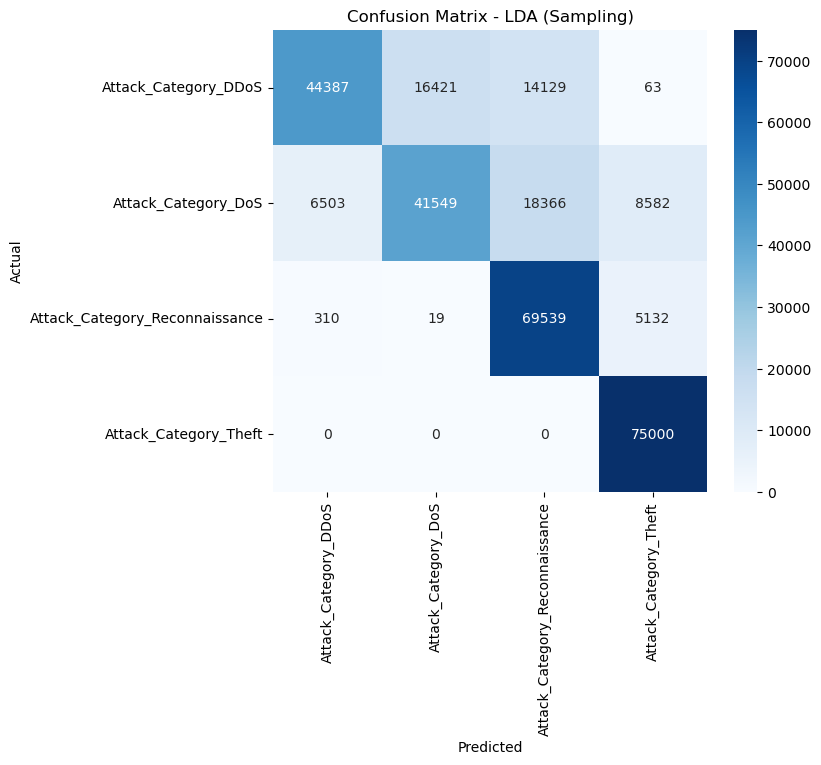

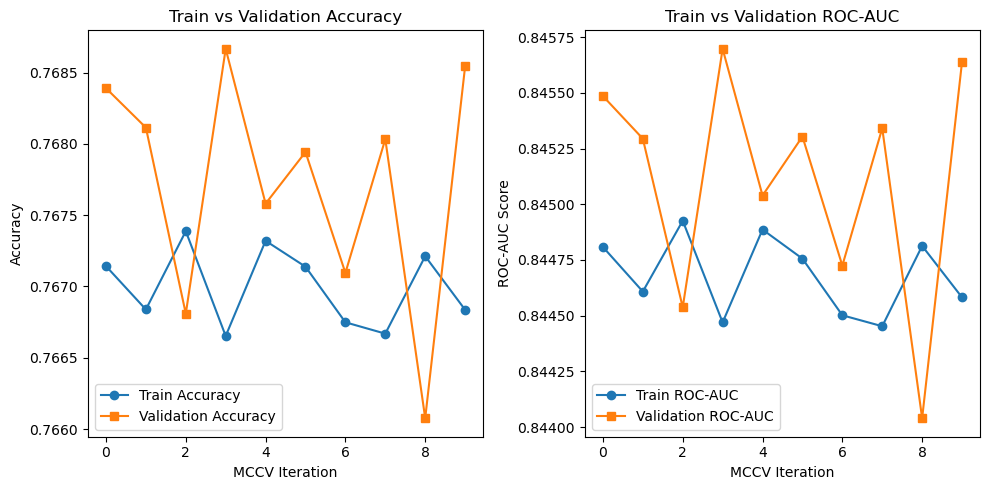

In [26]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.utils import resample

df = pd.read_csv("df_filtered_multiclass.csv")

df_attacks = df[df["Attack_Label"] == 1].copy()
df_attacks.drop(columns=["Attack_Label", "Attack_Category_Normal"], errors="ignore", inplace=True)

df_ddos  = df_attacks[df_attacks["Attack_Category_DDoS"] == 1]
df_dos   = df_attacks[df_attacks["Attack_Category_DoS"] == 1]
df_recon = df_attacks[df_attacks["Attack_Category_Reconnaissance"] == 1]
df_theft = df_attacks[df_attacks["Attack_Category_Theft"] == 1]

print("\Attack Category Counts (Before Sampling):")
print(f"DDoS = {len(df_ddos):,}")
print(f"DoS  = {len(df_dos):,}")
print(f"Reconnaissance = {len(df_recon):,}")
print(f"Theft = {len(df_theft):,}")

def hybrid_sample(df_class, target_size):
    size = len(df_class)
    if size > target_size:
        return resample(df_class, replace=False, n_samples=target_size, random_state=85)
    elif size < target_size:
        return resample(df_class, replace=True, n_samples=target_size, random_state=85)
    else:
        return df_class

target_size = 250000

df_ddos_bal  = hybrid_sample(df_ddos,  target_size)
df_dos_bal   = hybrid_sample(df_dos,   target_size)
df_recon_bal = hybrid_sample(df_recon, target_size)
df_theft_bal = hybrid_sample(df_theft, target_size)

df_balanced = pd.concat([df_ddos_bal, df_dos_bal, df_recon_bal, df_theft_bal], ignore_index=True)

print(f"\nAfter Sampling (target_size={target_size}):")
print(f"DDoS = {len(df_ddos_bal):,}")
print(f"DoS  = {len(df_dos_bal):,}")
print(f"Reconnaissance = {len(df_recon_bal):,}")
print(f"Theft = {len(df_theft_bal):,}")

y_multiclass = df_balanced[[
    "Attack_Category_DDoS", "Attack_Category_DoS",
    "Attack_Category_Reconnaissance", "Attack_Category_Theft"
]].idxmax(axis=1)
X_multiclass = df_balanced.drop(columns=[
    "Attack_Category_DDoS", "Attack_Category_DoS",
    "Attack_Category_Reconnaissance", "Attack_Category_Theft"
], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(
    X_multiclass, y_multiclass, test_size=0.3, random_state=85, stratify=y_multiclass
)

mccv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=85)

param_grid = {
    "solver": ["svd", "lsqr", "eigen"]
}

metrics = {
    "Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC-AUC": [],
    "Train Accuracy": [], "Train ROC-AUC": []
}

best_model = None
best_auc = 0
class_labels = np.unique(y_train)

for i, (train_idx, test_idx) in enumerate(mccv.split(X_train, y_train)):
    print(f"\nMCCV iteration {i+1}/{mccv.get_n_splits()}...")

    X_train_mccv, X_val_mccv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_mccv, y_val_mccv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    lda = LinearDiscriminantAnalysis()

    grid_search = GridSearchCV(lda, param_grid, cv=5, scoring="accuracy", n_jobs=10)
    grid_search.fit(X_train_mccv, y_train_mccv)

    best_iteration_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_train_pred = best_iteration_model.predict(X_train_mccv)
    y_train_prob = (
        pd.get_dummies(y_train_pred) if len(np.unique(y_train_mccv)) > 2
        else best_iteration_model.predict_proba(X_train_mccv)
    )
    train_acc = accuracy_score(y_train_mccv, y_train_pred)
    train_auc = roc_auc_score(y_train_mccv, y_train_prob, multi_class="ovr", average="weighted", labels=class_labels)

    y_val_pred = best_iteration_model.predict(X_val_mccv)
    y_val_prob = (
        pd.get_dummies(y_val_pred) if len(np.unique(y_val_mccv)) > 2
        else best_iteration_model.predict_proba(X_val_mccv)
    )
    acc = accuracy_score(y_val_mccv, y_val_pred)
    prec = precision_score(y_val_mccv, y_val_pred, average="weighted")
    rec = recall_score(y_val_mccv, y_val_pred, average="weighted")
    f1 = f1_score(y_val_mccv, y_val_pred, average="weighted")
    auc = roc_auc_score(y_val_mccv, y_val_prob, multi_class="ovr", average="weighted", labels=class_labels)

    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["ROC-AUC"].append(auc)
    metrics["Train Accuracy"].append(train_acc)
    metrics["Train ROC-AUC"].append(train_auc)

    if auc > best_auc:
        best_auc = auc
        best_model = best_iteration_model
        best_hyperparams = best_params

results = {
    metric: (np.mean(scores), np.std(scores))
    for metric, scores in metrics.items()
}
results["Mean Error"] = (1 - results["Accuracy"][0], results["Accuracy"][1])
results["Std Error"] = (results["Accuracy"][1], results["Accuracy"][1])

results_df = pd.DataFrame(results, index=["Mean", "Std Dev"]).T

print("\nMCCV Results for LDA (Sampling):")
print(results_df)

print("\nBest Hyperparameters:")
print(best_hyperparams)
joblib.dump(best_model, "best_lda_multiclass_attacks.pkl")
joblib.dump(best_hyperparams, "best_lda_hyperparams_multiclass_attacks.pkl")

y_test_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=class_labels)
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (Test Set):")
print(cm_df)

plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - LDA (Sampling)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(range(len(metrics["Accuracy"])), metrics["Train Accuracy"], label="Train Accuracy", marker="o")
plt.plot(range(len(metrics["Accuracy"])), metrics["Accuracy"], label="Validation Accuracy", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(metrics["ROC-AUC"])), metrics["Train ROC-AUC"], label="Train ROC-AUC", marker="o")
plt.plot(range(len(metrics["ROC-AUC"])), metrics["ROC-AUC"], label="Validation ROC-AUC", marker="s")
plt.xlabel("MCCV Iteration")
plt.ylabel("ROC-AUC Score")
plt.title("Train vs Validation ROC-AUC")
plt.legend()

plt.tight_layout()
plt.show()
